Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS104.N11

BigDL - 30/11/2022

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1iMtJuBr4HbiwDmIkvr54sZKaULll_Gej?usp=sharing)

# **[BigDL](https://bigdl.readthedocs.io/en/latest/index.html)**

## **[BigDL-Orca](https://bigdl.readthedocs.io/en/latest/doc/Orca/index.html)**

### **[Orca in 5 minutes](https://bigdl.readthedocs.io/en/latest/doc/Orca/Overview/orca.html)**

#### **Import libraries**

##### **Environment Preparation**

**Install Java 8**

Run the cell on the **Google Colab** to install jdk 1.8.

**Note:** if you run this notebook on your computer, root permission is required when running the cell to install Java 8. (You may ignore this cell if Java 8 has already been set up in your computer).


In [1]:
# Install jdk8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set environment variable JAVA_HOME.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_352"
OpenJDK Runtime Environment (build 1.8.0_352-8u352-ga-1~18.04-b08)
OpenJDK 64-Bit Server VM (build 25.352-b08, mixed mode)


**Install BigDL Orca**

You can install the latest pre-release version using `pip install --pre --upgrade bigdl-orca`. 

In [2]:
# Install latest pre-release version of BigDL Orca 
# Installing BigDL Orca from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-orca[ray]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.6/85.6 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.4/218.4 MB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7

In [3]:
# Install required dependencies
# !pip install tensorflow==1.15.0 tensorflow-datasets==2.1.0

In [4]:
import random

from tensorflow import keras
from bigdl.orca import init_orca_context, stop_orca_context, OrcaContext
from pyspark.sql.types import StructType, StructField, IntegerType
from bigdl.orca.learn.tf2.estimator import Estimator as tf_Estimator

TypeError: ignored

#### **TensorFlow Bite-sized Example**

In [ ]:
# cluster_mode can be "local", "k8s" or "yarn"
sc = init_orca_context(cluster_mode="local", cores=4, memory="10g", num_nodes=1)

In [ ]:
spark = OrcaContext.get_spark_session()

num_users, num_items = 200, 100
rdd = sc.range(0, 512).map(lambda x: [random.randint(0, num_users-1), 
                                      random.randint(0, num_items-1), 
                                      random.randint(0, 1)])
schema = StructType([StructField("user", IntegerType(), False),
                     StructField("item", IntegerType(), False),
                     StructField("label", IntegerType(), False)])
df = spark.createDataFrame(rdd, schema)
train_df, test_df = df.randomSplit([0.8, 0.2], seed=1)

In [ ]:
train_df.printSchema()
train_df.show()
train_df.count()

In [ ]:
test_df.printSchema()
test_df.show()
test_df.count()

In [ ]:
# Define the NCF model in standard TensorFlow API
def model_creator(config):
  user_input = keras.layers.Input(shape=(1,), dtype="int32", name="use_input")
  item_input = keras.layers.Input(shape=(1,), dtype="int32", name="item_input")

  mlp_embed_user = keras.layers.Embedding(input_dim=config["num_users"], 
                                          output_dim=config["embed_dim"],
                                          input_length=1)(user_input)
  mlp_embed_item = keras.layers.Embedding(input_dim=config["num_items"], 
                                          output_dim=config["embed_dim"],
                                          input_length=1)(item_input)

  user_latent = keras.layers.Flatten()(mlp_embed_user)
  item_latent = keras.layers.Flatten()(mlp_embed_item)

  mlp_latent = keras.layers.concatenate([user_latent, item_latent], axis=1)
  predictions = keras.layers.Dense(1, activation="sigmoid")(mlp_latent)
  model = keras.models.Model(inputs=[user_input, item_input], outputs=predictions)
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
batch_size = 64
train_steps = int(train_df.count() / batch_size)
val_steps = int(test_df.count() / batch_size)

est = tf_Estimator.from_keras(model_creator=model_creator, backend="spark",
                           config={"embed_dim": 8, "num_users": num_users, "num_items": num_items})

# Distributed training
est.fit(data=train_df,
        batch_size=batch_size,
        epochs=4,
        feature_cols=['user', 'item'],
        label_cols=['label'],
        steps_per_epoch=train_steps,
        validation_data=test_df,
        validation_steps=val_steps)

# Distributed inference
prediction_df = est.predict(test_df,
                            batch_size=batch_size,
                            feature_cols=['user', 'item'])

In [ ]:
prediction_df.printSchema()
prediction_df.show()
prediction_df.count()

In [ ]:
stop_orca_context()

### **[Key Features](https://bigdl.readthedocs.io/en/latest/doc/Orca/Overview/index.html)**

#### **[Distributed Data Processing](https://bigdl.readthedocs.io/en/latest/doc/Orca/Overview/data-parallel-processing.html)**

##### **Import libraries**

In [ ]:
import tensorflow as tf
import torch
import tensorflow_datasets as tfds
import numpy as np

from bigdl.orca.data.pandas import read_csv
from bigdl.orca.data import XShards
from torchvision import datasets, transforms
from bigdl.orca.learn.pytorch import Estimator as pytorch_Estimator

##### **TensorFlow Dataset and PyTorch DataLoader**

In [ ]:
# recommended to set it to True when running BigDL in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

cluster_mode = "local"

if cluster_mode == "local":  
    init_orca_context(cluster_mode="local", cores=1) # run in local mode
elif cluster_mode == "k8s":  
    init_orca_context(cluster_mode="k8s", num_nodes=2, cores=2) # run on K8s cluster
elif cluster_mode == "yarn":  
    init_orca_context(cluster_mode="yarn-client", num_nodes=2, cores=2) # run on Hadoop YARN cluster

###### **TensorFlow Dataset**

In [ ]:
def preprocess(data):
  data['image'] = tf.cast(data["image"], tf.float32) / 255.
  return data['image'], data['label']

In [ ]:
def train_data_creator(config, batch_size):
  dataset = tfds.load(name="mnist", split="train") # , data_dir=dataset_dir
  dataset = dataset.map(preprocess)
  dataset = dataset.shuffle(1000)
  dataset = dataset.batch(batch_size)
  return dataset

In [ ]:
batch_size = 64
dataset = train_data_creator(config, batch_size)
est = tf_Estimator.from_keras(keras_model=model)
est.fit(data=dataset)

###### **Pytorch DataLoader**

In [ ]:
def train_data_creator(config, batch_size):
  train_loader = torch.utils.data.DataLoader(datasets.MNIST(config["dir"], train=True, download=True,
                                                            transform=transforms.Compose([transforms.ToTensor(),
                                                                                          transforms.Normalize((0.1307,), (0.3081,))])),
                                             batch_size=batch_size, shuffle=True)
  return train_loader

In [ ]:
batch_size = 64
train_loader = train_data_creator(config, batch_size)

est = pytorch_Estimator.from_torch(model=torch_model, optimizer=torch_optim, loss=torch_criterion)
est.fit(data=train_loader)

##### **Spark Dataframes**

In [ ]:
df = spark.read.parquet("data.parquet")
est = tf_Estimator.from_keras() # keras_model=model # the model accept two inputs and one label
est.fit(data=df,
        feature_cols=['user', 'item'], # specifies which column(s) to be used as inputs
        label_cols=['label']) # specifies which column(s) to be used as labels

##### **XShards (Distributed Data-Parallel Python Processing)**

In [ ]:
train_images = np.random.random((20, 3, 224, 224))
train_label_images = np.zeros(20)
train_shards = XShards.partition([train_images, train_label_images])

def transform_to_dict(train_data):
  return {"x": train_data[0], "y": train_data[1]}
    
train_shards = train_shards.transform_shard(transform_to_dict)

###### **Data-Parallel Pandas**

In [ ]:
csv_path = "/path/to/csv_file_or_folder"
shard = read_csv(csv_path)

In [ ]:
def negative(df, column_name):
    df[column_name] = df[column_name] * (-1)
    return df
    
train_shards = shard.transform_shard(negative, 'value')

In [ ]:
shard.partition_by(cols="location", num_partitions=4)
location_list = shard["location"].unique()

#### **[Distributed Training and Inference](https://bigdl.readthedocs.io/en/latest/doc/Orca/Overview/distributed-training-inference.html)**

##### **Import libraries**

In [ ]:
import numpy as np

from bigdl.dllib.nn.criterion import *
from bigdl.dllib.nn.layer import *
from bigdl.dllib.optim.optimizer import *
from bigdl.orca.learn.bigdl import Estimator as bigdl_Estimator
from bigdl.orca.learn.mxnet import Estimator as mxnet_Estimator
from bigdl.orca.learn.mxnet import create_config
from bigdl.orca.learn.openvino import Estimator as openvino_Estimator

##### **TensorFlow/Keras Estimator**

###### **TensorFlow 2.x and Keras 2.4+**

**Using `ray` or Horovod backend**

In [ ]:
def model_creator(config):
    model = create_keras_lenet_model()
    model.compile(optimizer=keras.optimizers.RMSprop(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
est = tf_Estimator.from_keras(model_creator=model_creator) # or backend="horovod"

In [ ]:
def train_data_creator(config, batch_size):
    dataset = tfds.load(name="mnist", split="train")
    dataset = dataset.map(preprocess)
    dataset = dataset.batch(batch_size)
    return dataset

In [ ]:
stats = est.fit(data=train_data_creator,
                epochs=max_epoch,
                steps_per_epoch=total_size // batch_size)
predictions = est.predict(data=df,
                          feature_cols=['image'])

**Using spark backend**

In [ ]:
def model_creator(config):
  model = create_keras_lenet_model()
  model.compile(**compile_args(config))
  return model

In [ ]:
def compile_args(config):
  if "lr" in config:
      lr = config["lr"]
  else:
      lr = 1e-2
  args = {
      "optimizer": keras.optimizers.SGD(lr),
      "loss": "mean_squared_error",
      "metrics": ["mean_squared_error"]
  }
  return args

In [ ]:
est = Estimator.from_keras(model_creator=model_creator,
                           config={"lr": 1e-2},
                           workers_per_node=2,
                           backend="spark",
                           model_dir=model_dir)

In [ ]:
def train_data_creator(config, batch_size):
    dataset = tfds.load(name="mnist", split="train")
    dataset = dataset.map(preprocess)
    dataset = dataset.batch(batch_size)
    return dataset

In [ ]:
stats = est.fit(data=train_data_creator,
                epochs=max_epoch,
                steps_per_epoch=total_size // batch_size)
predictions = est.predict(data=df,
                          feature_cols=['image']).collect()

##### **PyTorch Estimator**

###### **Using BigDL backend**

In [ ]:
def model_creator(config):
  model = LeNet() # a torch.nn.Module
  model.train()
  return model

In [ ]:
def optimizer_creator(model, config):
  return torch.optim.Adam(model.parameters(), config["lr"])

In [ ]:
est = Estimator.from_torch(model=model_creator,
                           optimizer=optimizer_creator,
                           loss=nn.NLLLoss(),
                           config={"lr": 1e-2})

In [ ]:
est.fit(data=train_loader, epochs=args.epochs)
predictions = est.predict(xshards)

###### **Using `torch.distributed` or Horovod backend**

In [ ]:
def model_creator(config):
  model = LeNet() # a torch.nn.Module
  model.train()
  return model

In [ ]:
def optimizer_creator(model, config):
  return torch.optim.Adam(model.parameters(), config["lr"])

In [ ]:
est = Estimator.from_torch(model=model_creator,
                           optimizer=optimizer_creator,
                           loss=nn.NLLLoss(),
                           config={"lr": 1e-2},
                           backend="ray") # or backend="horovod"

In [ ]:
est.fit(data=train_loader_func, epochs=args.epochs)
predictions = est.predict(data=df,
                          feature_cols=['image'])

##### **MXNet Estimator**

In [ ]:
def get_model(config):
  net = LeNet() # a mxnet.gluon.Block
  return net

In [ ]:
def get_loss(config):
  return gluon.loss.SoftmaxCrossEntropyLoss()

In [ ]:
config = create_config(log_interval=2, optimizer="adam",
                       optimizer_params={'learning_rate': 0.02})
est = mxnet_Estimator.from_mxnet(config=config,
                                 model_creator=get_model,
                                 loss_creator=get_loss,
                                 num_workers=2)

In [ ]:
def get_train_data_iter(config, kv):
  train = mx.io.NDArrayIter(data_ndarray, label_ndarray,
                            batch_size=config["batch_size"], shuffle=True)
  return train

In [ ]:
est.fit(get_train_data_iter, epochs=2)

##### **BigDL Estimator**

In [ ]:
linear_model = Sequential().add(Linear(2, 2))
mse_criterion = MSECriterion()
est = bigdl_Estimator.from_bigdl(model=linear_model, 
                                 loss=mse_criterion, 
                                 optimizer=Adam())

In [ ]:
# read spark Dataframe
df = spark.read.parquet("data.parquet")

# distributed model training
est.fit(df, 1, batch_size=4)

#distributed model inference
result_df = est.predict(df)

##### **OpenVINO Estimator**

In [ ]:
model_path = "The/file_path/to/the/OpenVINO_IR_xml_file"
est = openvino_Estimator.from_openvino(model_path=model_path)

In [ ]:
# ndarray
input_data = np.random.random([20, 4, 3, 224, 224])
result = est.predict(input_data)

# xshards
shards = XShards.partition({"x": input_data})
result_shards = est.predict(shards)

#### **[Distributed Hyper-Parameter Tuning](https://bigdl.readthedocs.io/en/latest/doc/Orca/Overview/distributed-tuning.html)**

##### **Import libraries**

In [ ]:
!pip install bayesian-optimization

In [ ]:
import torch.nn as nn
import torch

from bigdl.orca.automl import hp
from bigdl.orca.automl.auto_estimator import AutoEstimator

##### **Pytorch AutoEstimator**

###### **Data Creator Function**

In [ ]:
# "batch_size" is the hyper-parameter to be tuned.
def train_loader_creator(config):
  train_loader = torch.utils.data.DataLoader(datasets.MNIST(dir, train=True, download=True,
                                                            transform=transforms.Compose([transforms.ToTensor(),
                                                                                          transforms.Normalize((0.1307,), (0.3081,))])), 
                                             batch_size=config["batch_size"], shuffle=True)
  return train_loader

###### **Model Creator Function**

In [ ]:
class LeNet(nn.Module):
  def __init__(self, fc1_hidden_size=500):
    super(LeNet, self).__init__()
    self.conv1 = nn.Conv2d(1, 20, 5, 1)
    self.conv2 = nn.Conv2d(20, 50, 5, 1)
    self.fc1 = nn.Linear(4*4*50, fc1_hidden_size)
    self.fc2 = nn.Linear(fc1_hidden_size, 10)

  def forward(self, x):
    pass

def model_creator(config):
  # "fc1_hidden_size" is the hyper-parameter to be tuned.
  model = LeNet(fc1_hidden_size=config["fc1_hidden_size"])
  return model

###### **Optimizer Creator Function**

In [ ]:
def optim_creator(model, config):
  return torch.optim.Adam(model.parameters(), lr=config["lr"])

###### **Create and Fit Pytorch AutoEstimator**

In [ ]:
auto_est = AutoEstimator.from_torch(model_creator=model_creator,
                                    optimizer=optim_creator,
                                    loss=nn.NLLLoss(),
                                    logs_dir="/tmp/orca_automl_logs",
                                    resources_per_trial={"cpu": 2},
                                    name="lenet_mnist")

In [ ]:
auto_est.fit(data=train_loader_creator,
             validation_data=test_loader_creator,
             search_space=search_space,
             n_sampling=2,
             epochs=1,
             metric="accuracy")

In [ ]:
best_model = auto_est.get_best_model() # a `torch.nn.Module` object
best_config = auto_est.get_best_config() # a dictionary of hyper-parameter names and values.

##### **TensorFlow/Keras AutoEstimator**

In [ ]:
def model_creator(config):
  model = tf.keras.models.Sequential([tf.keras.layers.Dense(config["hidden_size"],
                                                            input_shape=(1,)),
                                      tf.keras.layers.Dense(1)])
  model.compile(loss="mse",
                optimizer=tf.keras.optimizers.SGD(config["lr"]),
                metrics=["mse"])
  return model

In [ ]:
auto_est = AutoEstimator.from_keras(model_creator=model_creator,
                                    logs_dir="/tmp/orca_automl_logs",
                                    resources_per_trial={"cpu": 2},
                                    name="auto_keras")

In [ ]:
best_model = auto_est.get_best_model() # a `torch.nn.Module` object
best_config = auto_est.get_best_config() # a dictionary of hyper-parameter names and values.

##### **Search Space and Search Algorithms**

###### **Basic Search Algorithms**

In [ ]:
search_space = {
    "fc1_hidden_size": hp.grid_search([500, 600]),
    "lr": hp.loguniform(0.001, 0.1),
    "batch_size": hp.choice([160, 320, 640]),
}

###### **Advanced Search Algorithms**

In [ ]:
search_space = {
    "width": hp.uniform(0, 20),
    "height": hp.uniform(-100, 100)
}

auto_estimator.fit(
    data,
    search_space=search_space,
    metric="mean_loss",
    mode="min",
    search_alg="bayesopt",
)

##### **Scheduler**

In [ ]:
scheduler_params = dict(max_t=50,
                        grace_period=1,
                        reduction_factor=3,
                        brackets=3,)

auto_estimator.fit(data,
                   search_space=search_space,
                   metric="mean_loss",
                   mode="min",
                   search_alg="skopt",
                   scheduler = "AsyncHyperBand",
                   scheduler_params=scheduler_params)

#### **[RayOnSpark](https://bigdl.readthedocs.io/en/latest/doc/Orca/Overview/ray.html)**

##### **Import libraries**

In [ ]:
conda create -n py37 python=3.7  # "py37" is conda environment name, you can use any name you like.
conda activate py37

!pip install bigdl-orca[ray]

In [ ]:
import ray

from bigdl.orca import init_orca_context, OrcaContext, stop_orca_context

##### **Initialize**

In [ ]:
sc = init_orca_context(cluster_mode="yarn-client", cores=4, memory="10g", num_nodes=2, init_ray_on_spark=True)

In [ ]:
OrcaContext.barrier_mode = False

##### **Run**

In [ ]:
@ray.remote
class Counter(object):
  def __init__(self):
      self.n = 0

  def increment(self):
      self.n += 1
      return self.n

counters = [Counter.remote() for i in range(5)]
print(ray.get([c.increment.remote() for c in counters]))

In [ ]:
ray_ctx = OrcaContext.get_ray_context()
address_info = ray_ctx.address_info  # The dictionary information of the ray cluster, including node_ip_address, object_store_address, webui_url, etc.
redis_address = ray_ctx.redis_address  # The redis address of the ray cluster.

In [ ]:
stop_orca_context()

### **[Orca Quickstarts](https://bigdl.readthedocs.io/en/latest/doc/Orca/QuickStart/index.html)**

#### **[TensorFlow 2 Quickstart](https://bigdl.readthedocs.io/en/latest/doc/Orca/QuickStart/orca-tf2keras-quickstart.html)**

##### **Environment Preparation**

**Install Java 8**

Run the cell on the **Google Colab** to install jdk 1.8.

**Note:** if you run this notebook on your computer, root permission is required when running the cell to install Java 8. (You may ignore this cell if Java 8 has already been set up in your computer).


In [1]:
# Install jdk8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set environment variable JAVA_HOME.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_352"
OpenJDK Runtime Environment (build 1.8.0_352-8u352-ga-1~18.04-b08)
OpenJDK 64-Bit Server VM (build 25.352-b08, mixed mode)


**Install BigDL Orca**

You can install the latest pre-release version using `pip install --pre --upgrade bigdl-orca`. 

In [6]:
# Install latest pre-release version of BigDL Orca 
# Installing BigDL Orca from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-orca[ray]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

##### **Distributed TensorFlow 2 using Orca APIs**

In this guide we will describe how to scale out TensorFlow 2 programs using Orca in 4 simple steps.

In [7]:
# import necesary libraries and modules
import argparse

from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext

TypeError: ignored

###### **Step 1: Init Orca Context** 

In [ ]:
# recommended to set it to True when running BigDL in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

cluster_mode = "local"

if cluster_mode == "local":  
    init_orca_context(cluster_mode="local", cores=1) # run in local mode
elif cluster_mode == "k8s":  
    init_orca_context(cluster_mode="k8s", num_nodes=2, cores=2) # run on K8s cluster
elif cluster_mode == "yarn":  
    init_orca_context(cluster_mode="yarn-client", num_nodes=2, cores=2) # run on Hadoop YARN cluster

This is the only place where you need to specify local or distributed mode. View [Orca Context](https://bigdl.readthedocs.io/en/latest/doc/Orca/Overview/orca-context.html) for more details.

**Note**: You should export HADOOP_CONF_DIR=/path/to/hadoop/conf/dir when you run on Hadoop YARN cluster.

###### **Step 2: Define the Model**

You can then define the Keras model in the *Creator Function* using the standard TensroFlow 2 APIs.

In [ ]:
def model_creator(config):
    import tensorflow as tf
    model = tf.keras.Sequential(
        [tf.keras.layers.Conv2D(20, kernel_size=(5, 5), strides=(1, 1), activation='tanh',
                                input_shape=(28, 28, 1), padding='valid'),
         tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
         tf.keras.layers.Conv2D(50, kernel_size=(5, 5), strides=(1, 1), activation='tanh',
                                padding='valid'),
         tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(500, activation='tanh'),
         tf.keras.layers.Dense(10, activation='softmax'),
         ]
    )

    model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

###### **Step 3: Define Train Dataset**

You can define the dataset in the _Creator Function_ using standard [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) APIs. 

In [ ]:
def preprocess(x, y):
    import tensorflow as tf
    x = tf.cast(tf.reshape(x, (28, 28, 1)), dtype=tf.float32) / 255.0
    return x, y

def train_data_creator(config, batch_size):
    import tensorflow as tf
    (train_feature, train_label), _ = tf.keras.datasets.mnist.load_data()

    dataset = tf.data.Dataset.from_tensor_slices((train_feature, train_label))
    dataset = dataset.repeat()
    dataset = dataset.map(preprocess)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size)
    return dataset

def val_data_creator(config, batch_size):
    import tensorflow as tf
    _, (val_feature, val_label) = tf.keras.datasets.mnist.load_data()

    dataset = tf.data.Dataset.from_tensor_slices((val_feature, val_label))
    dataset = dataset.repeat()
    dataset = dataset.map(preprocess)
    dataset = dataset.batch(batch_size)
    return dataset

###### **Step 4: Fit with Orca Estimator**

First, create an Estimator.



In [ ]:
from bigdl.orca.learn.tf2 import Estimator

batch_size = 320
est = Estimator.from_keras(model_creator=model_creator, workers_per_node=1)

Next, fit the Estimator.

In [ ]:
max_epoch=1
stats = est.fit(train_data_creator,
                epochs=max_epoch,
                batch_size=batch_size,
                steps_per_epoch=60000 // batch_size,
                validation_data=val_data_creator,
                validation_steps=10000 // batch_size)
est.save_checkpoint("/tmp/mnist_keras.ckpt")

Finally, evaluate using the Estimator.

In [ ]:
stats = est.evaluate(val_data_creator, num_steps=10000 // batch_size)
print(stats)

Now, the accuracy of this model has reached 98%.

###### **Step 5: Save the model with Orca Estimator**

Save model in SavedModel format.



In [ ]:
# save model in SavedModel format
est.save("/tmp/lenet_model")
# load model
# est.load("/tmp/cifar10_model")
est.shutdown()

In [ ]:
# Stop orca context when your program finishes
stop_orca_context()

#### **[PyTorch Quickstart](https://bigdl.readthedocs.io/en/latest/doc/Orca/QuickStart/orca-pytorch-quickstart.html)**

##### **Environment Preparation**

**Install Java 8**

Run the cell on the **Google Colab** to install jdk 1.8.

**Note:** if you run this notebook on your computer, root permission is required when running the cell to install Java 8. (You may ignore this cell if Java 8 has already been set up in your computer).

In [ ]:
# Install jdk8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set environment variable JAVA_HOME.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

**Install BigDL Orca**

 

You can install the latest pre-release version using `pip install --pre --upgrade bigdl-orca`.

In [ ]:
# Installing BigDL Orca from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-orca

In [ ]:
# Install python dependencies
!pip install torch torchvision
!pip install tqdm

##### **Distributed PyTorch using Orca APIs**

In this guide we will describe how to scale out PyTorch programs using Orca in 5 simple steps.

In [ ]:
# import necesary libraries and modules
from __future__ import print_function
import os
import argparse

from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext

###### **Step 1: Init Orca Context**

In [ ]:
# recommended to set it to True when running BigDL in Jupyter notebook. 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

cluster_mode = "local"

if cluster_mode == "local": # For local machine
    init_orca_context(cores=1, memory="2g")
elif cluster_mode == "k8s": # For K8s cluster
    init_orca_context(cluster_mode="k8s", num_nodes=2, cores=2, memory="10g", driver_memory="10g", driver_cores=1)
elif cluster_mode == "yarn": # For Hadoop/YARN cluster
    init_orca_context(cluster_mode="yarn", num_nodes=2, cores=2, memory="10g", driver_memory="10g", driver_cores=1)

###### **Step 2: Define the Model**
You may define your model, loss and optimizer in the same way as in any standard (single node) PyTorch program.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

After defining your model, you need to define a *Model Creator Function* that takes the parameter `config` and returns an instance of your model, and a *Optimizer Creator Function* that has two parameters `model` and `config` and returns a PyTorch optimizer.

In [ ]:
def model_creator(config):
    model = LeNet()
    return model

def optim_creator(model, config):
    return torch.optim.Adam(model.parameters(), lr=0.001)

###### **Step 3: Define Train Dataset**

You can define the dataset using a *Data Creator Function* that has two parameters `config` and `batch_size` and returns a PyTorch `DataLoader`. Orca also supports [Spark DataFrames](https://bigdl.readthedocs.io/en/latest/doc/Orca/Overview/data-parallel-processing.html#spark-dataframes) and [XShards](https://bigdl.readthedocs.io/en/latest/doc/Orca/Overview/data-parallel-processing.html#xshards-distributed-data-parallel-python-processing).

In [ ]:
import torch
from torchvision import datasets, transforms

batch_size = 64
dir = '/tmp/dataset'

def train_loader_creator(config, batch_size):
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST(dir, train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True)
    return train_loader

def test_loader_creator(config, batch_size):
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST(dir, train=False,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=False)
    return test_loader

###### **Step 4: Fit with Orca Estimator**

First, Create an Estimator and set its backend to `spark`(currently default for PyTorch Estimator).

In [ ]:
from bigdl.orca.learn.pytorch import Estimator
from bigdl.orca.learn.metrics import Accuracy

est = Estimator.from_torch(model=model_creator, 
                           optimizer=optim_creator, 
                           loss=nn.NLLLoss(), 
                           metrics=[Accuracy()], 
                           use_tqdm=True)

Next, fit and evaluate using the Estimator.

In [ ]:
est.fit(data=train_loader_creator, epochs=1, batch_size=batch_size)
result = est.evaluate(data=test_loader_creator, batch_size=batch_size)
for r in result:
    print(r, ":", result[r])

The accuracy of this model has reached 98%.

###### **Step 5: Save the model**

Save the Estimator states (including model and optimizer) to the provided model path.

In [ ]:
est.save("mnist_model")

In [ ]:
# stop orca context when program finishes
stop_orca_context()

#### **[RayOnSpark Quickstart](https://bigdl.readthedocs.io/en/latest/doc/Orca/QuickStart/ray-quickstart.html)**

##### **Environment Preparation**

**Install Java 8**

Run the cell on the **Google Colab** to install jdk 1.8.

**Note:** if you run this notebook on your computer, root permission is required when running the cell to install Java 8. (You may ignore this cell if Java 8 has already been set up in your computer).

In [ ]:
# Install jdk8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set environment variable JAVA_HOME.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

**Install BigDL Orca**

You can install the latest pre-release version using `!pip install --pre --upgrade bigdl-orca`. 

In [ ]:
# Install latest pre-release version of BigDL Orca with ray
# Installing BigDL Orca from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-orca[ray]

##### **RayOnSpark: run Ray programs directly on Big Data clusters**

In this guide, we will describe how to use RayOnSpark to directly run Ray programs on Big Data clusters in 2 simple steps.

In [ ]:
# import necesary libraries and modules
from bigdl.orca import init_orca_context, stop_orca_context, OrcaContext
import ray
import time
import numpy as np

###### **Step 1: Initialize**
We recommend using `init_orca_context` to initiate and run BigDL on the underlying cluster. The Ray cluster would be launched automatically by specifying `init_ray_on_spark=True`.

In [ ]:
OrcaContext.log_output = True # recommended to set it to True when running BigDL in Jupyter notebook (this will display terminal's  stdout and stderr in the Jupyter notebook).

cluster_mode = "local"

if cluster_mode == "local":
    sc = init_orca_context(cluster_mode="local", cores=4, memory="10g", init_ray_on_spark=True)  # run in local mode
elif cluster_mode == "k8s":
    sc = init_orca_context(cluster_mode="k8s", num_nodes=2, cores=2, memory="10g", init_ray_on_spark=True)  # run on K8s cluster
elif cluster_mode == "yarn":
    sc = init_orca_context(cluster_mode="yarn", num_nodes=2, cores=2, memory="10g", init_ray_on_spark=True)  # run on Hadoop YARN cluster

This is the only place where you need to specify local or distributed mode. View [Orca Context](https://bigdl.readthedocs.io/en/latest/doc/Orca/Overview/orca-context.html) for more details.

**Note:** You should `export HADOOP_CONF_DIR=/path/to/hadoop/conf/dir` when running on Hadoop YARN cluster.

You can retrieve the information of the Ray cluster via `OrcaContext`:

In [ ]:
ray_ctx = OrcaContext.get_ray_context()
address_info = ray_ctx.address_info  # The dictionary information of the ray cluster, including node_ip_address, object_store_address, webui_url, etc.
redis_address = ray_ctx.redis_address  # The redis address of the ray cluster.
print(address_info['object_store_address'])

###### **Step 2: Run Ray Applications**
After the initialization, you can directly write Ray code inline with your Spark code, and run Ray programs on the underlying existing Big Data clusters. Ray [tasks](https://docs.ray.io/en/master/walkthrough.html#remote-functions-tasks) and [actors](https://docs.ray.io/en/master/actors.html) would be launched across the cluster.

The following example uses actor handles to implement a parameter server example for distributed asynchronous stochastic gradient descent. This is a simple Ray example for demonstration purpose. Similarly, you can write other Ray applications as you wish.

A parameter server is simply an object that stores the parameters (or "weights") of a machine learning model (this could be a neural network, a linear model, or something else). It exposes two methods: one for getting the parameters and one for updating the parameters.

By adding the `@ray.remote` decorator, the `ParameterServer` class becomes a Ray actor.

In [ ]:
dim = 10
@ray.remote
class ParameterServer(object):
    def __init__(self, dim):
        self.parameters = np.zeros(dim)
    
    def get_parameters(self):
        return self.parameters
    
    def update_parameters(self, update):
        self.parameters += update

ps = ParameterServer.remote(dim)

In a typical machine learning training application, worker processes will run in an infinite loop that does the following:

1. Get the latest parameters from the parameter server.
2. Compute an update to the parameters (using the current parameters and some data).
3. Send the update to the parameter server.

By adding the `@ray.remote` decorator, the `worker` function becomes a Ray remote function.

In [ ]:
@ray.remote
def worker(ps, dim, num_iters):
    for _ in range(num_iters):
        # Get the latest parameters.
        parameters = ray.get(ps.get_parameters.remote())
        # Compute an update.
        update = 1e-3 * parameters + np.ones(dim)
        # Update the parameters.
        ps.update_parameters.remote(update)
        # Sleep a little to simulate a real workload.
        time.sleep(0.5)

# Test that worker is implemented correctly. You do not need to change this line.
ray.get(worker.remote(ps, dim, 1))

# Start two workers.
worker_results = [worker.remote(ps, dim, 100) for _ in range(2)]

As the worker tasks are executing, you can query the parameter server from the driver and see the parameters changing in the background.

In [ ]:
print(ray.get(ps.get_parameters.remote()))

**Note:** You should call `stop_orca_context()` when your program finishes:

In [ ]:
stop_orca_context()

#### **[TensorFlow 1.15 Quickstart](https://bigdl.readthedocs.io/en/latest/doc/Orca/QuickStart/orca-tf-quickstart.html)**

##### **Environment Preparation**

**Install Java 8**

Run the cell on the **Google Colab** to install jdk 1.8.

**Note:** if you run this notebook on your computer, root permission is required when running the cell to install Java 8. (You may ignore this cell if Java 8 has already been set up in your computer).


In [ ]:
# Install jdk8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set environment variable JAVA_HOME.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

**Install BigDL Orca**

You can install the latest pre-release version using `pip install --pre --upgrade bigdl-orca`. 

In [ ]:
# Install latest pre-release version of BigDL Orca 
# Installing BigDL Orca from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-orca

In [ ]:
# Install required dependencies
!pip install tensorflow==1.15.0 tensorflow-datasets==2.1.0

##### **Distributed TensorFlow (v1.15) using Orca APIs**

In this guide we will describe how to scale out TensorFlow (v1.15) programs using Orca in 4 simple steps.

In [ ]:
# import necesary libraries and modules
import argparse

from bigdl.orca.learn.tf.estimator import Estimator
from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext

###### **Step 1: Init Orca Context** 

In [ ]:
OrcaContext.log_output = True # recommended to set it to True when running BigDL in Jupyter notebook (this will display terminal's stdout and stderr in the Jupyter notebook).

cluster_mode = "local"

if cluster_mode == "local":  
    init_orca_context(cluster_mode="local", cores=4) # run in local mode
    dataset_dir = "~/tensorflow_datasets"
elif cluster_mode == "k8s":  
    init_orca_context(cluster_mode="k8s", num_nodes=2, cores=2) # run on K8s cluster
elif cluster_mode == "yarn":  
    init_orca_context(cluster_mode="yarn-client", num_nodes=2, cores=2) # run on Hadoop YARN cluster
    dataset_dir = "hdfs:///tensorflow_datasets"

This is the only place where you need to specify local or distributed mode. View [Orca Context](https://bigdl.readthedocs.io/en/latest/doc/Orca/Overview/orca-context.html) for more details.

**Note**: You should export HADOOP_CONF_DIR=/path/to/hadoop/conf/dir when you run on Hadoop YARN cluster. To use tensorflow_datasets on HDFS, you should correctly set HADOOP_HOME, HADOOP_HDFS_HOME, LD_LIBRARY_PATH, etc. For more details, please refer to TensorFlow documentation [link](https://github.com/tensorflow/docs/blob/r1.11/site/en/deploy/hadoop.md).



###### **Step 2: Define the Model**

You may define your model, loss and metrics in the same way as in any standard (single node) TensorFlow program.

In [ ]:
import tensorflow as tf

def accuracy(logits, labels):
  predictions = tf.argmax(logits, axis=1, output_type=labels.dtype)
  is_correct = tf.cast(tf.equal(predictions, labels), dtype=tf.float32)
  return tf.reduce_mean(is_correct)


def lenet(images):
  with tf.variable_scope('LeNet', [images]):
    net = tf.layers.conv2d(images, 32, (5, 5), activation=tf.nn.relu, name='conv1')
    net = tf.layers.max_pooling2d(net, (2, 2), 2, name='pool1')
    net = tf.layers.conv2d(net, 64, (5, 5), activation=tf.nn.relu, name='conv2')
    net = tf.layers.max_pooling2d(net, (2, 2), 2, name='pool2')
    net = tf.layers.flatten(net)
    net = tf.layers.dense(net, 1024, activation=tf.nn.relu, name='fc3')
    logits = tf.layers.dense(net, 10)
    return logits

# tensorflow inputs
images = tf.placeholder(dtype=tf.float32, shape=(None, 28, 28, 1))
# tensorflow labels
labels = tf.placeholder(dtype=tf.int32, shape=(None,))

logits = lenet(images)

loss = tf.reduce_mean(tf.losses.sparse_softmax_cross_entropy(logits=logits, labels=labels))

acc = accuracy(logits, labels)

###### **Step 3: Define Train Dataset**

In [ ]:
import tensorflow_datasets as tfds

def preprocess(data):
  data['image'] = tf.cast(data["image"], tf.float32) / 255.
  return data['image'], data['label']

In [ ]:
# get DataSet
mnist_train = tfds.load(name="mnist", split="train", data_dir=dataset_dir)
mnist_test = tfds.load(name="mnist", split="test", data_dir=dataset_dir)

mnist_train = mnist_train.map(preprocess)
mnist_test = mnist_test.map(preprocess)

###### **Step 4: Fit with Orca Estimator**

First, create an Estimator.



In [ ]:
est = Estimator.from_graph(inputs=images,
                           outputs=logits,
                           labels=labels,
                           loss=loss,
                           optimizer=tf.train.AdamOptimizer(),
                           metrics={"acc": acc})

Next, fit the Estimator.

In [ ]:
max_epoch = 1
est.fit(data=mnist_train,
        batch_size=320,
        epochs=max_epoch,
        validation_data=mnist_test)

Finally, evaluate using the Estimator.

In [ ]:
result = est.evaluate(mnist_test)
print(result)

est.save_tf_checkpoint("/tmp/lenet/model")

Now, the accuracy of this model has reached 98%.

In [ ]:
# Stop orca context when your program finishes
stop_orca_context()

#### **[Keras 2.3 Quickstart](https://bigdl.readthedocs.io/en/latest/doc/Orca/QuickStart/orca-keras-quickstart.html)**

##### **Environment Preparation**

**Install Java 8**

Run the cell on the **Google Colab** to install jdk 1.8.

**Note:** if you run this notebook on your computer, root permission is required when running the cell to install Java 8. (You may ignore this cell if Java 8 has already been set up in your computer).

In [ ]:
# Install jdk8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set environment variable JAVA_HOME.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

**Install BigDL Orca**

You can install the latest pre-release version using `!pip install --pre --upgrade bigdl-orca`. 

In [ ]:
# Install latest pre-release version of BigDL Orca 
# Installing BigDL Orca from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-orca

In [ ]:
# Install python dependencies
# The tutorial below only supports TensorFlow 1.15
!pip install tensorflow==1.15.0 tensorflow-datasets==2.1.0

##### **Distributed Keras (v2.3) using Orca APIs**

In this guide we will describe how to scale out Keras (v2.3) programs using Orca in 4 simple steps.

In [ ]:
# import necesary libraries and modules
import argparse

from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca.learn.tf.estimator import Estimator
from bigdl.orca import OrcaContext

###### **Step 1: Init Orca Context**

In [ ]:
OrcaContext.log_output = True # recommended to set it to True when running BigDL in Jupyter notebook (this will display terminal's  stdout and stderr in the Jupyter notebook).

cluster_mode = "local"

if cluster_mode == "local":  
    init_orca_context(cluster_mode="local", cores=4) # run in local mode
    dataset_dir = "~/tensorflow_datasets"
elif cluster_mode == "k8s":  
    init_orca_context(cluster_mode="k8s", num_nodes=2, cores=2) # run on K8s cluster
elif cluster_mode == "yarn":  
    init_orca_context(cluster_mode="yarn-client", num_nodes=2, cores=2) # run on Hadoop YARN cluster
    dataset_dir = "hdfs:///tensorflow_datasets"

This is the only place where you need to specify local or distributed mode. View [Orca Context](https://bigdl.readthedocs.io/en/latest/doc/Orca/Overview/orca-context.html) for more details.

**Note**: You should export HADOOP_CONF_DIR=/path/to/hadoop/conf/dir when you run on Hadoop YARN cluster. To use tensorflow_datasets on HDFS, you should correctly set HADOOP_HOME, HADOOP_HDFS_HOME, LD_LIBRARY_PATH, etc. For more details, please refer to TensorFlow documentation [link](https://github.com/tensorflow/docs/blob/r1.11/site/en/deploy/hadoop.md).



###### **Step 2: Define the Model**
You may define your model, loss and metrics in the same way as in any standard (single node) Keras program.

In [ ]:
from tensorflow import keras

model = keras.Sequential(
        [keras.layers.Conv2D(20, kernel_size=(5, 5), strides=(1, 1), activation='tanh',
                             input_shape=(28, 28, 1), padding='valid'),
         keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
         keras.layers.Conv2D(50, kernel_size=(5, 5), strides=(1, 1), activation='tanh',
                             padding='valid'),
         keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
         keras.layers.Flatten(),
         keras.layers.Dense(500, activation='tanh'),
         keras.layers.Dense(10, activation='softmax'),
         ]
    )

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###### **Step 3: Define Train Dataset**
You can define the dataset using standard tf.data.Dataset. 

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

def preprocess(data):
  data['image'] = tf.cast(data["image"], tf.float32) / 255.
  return data['image'], data['label']

# get DataSet
mnist_train = tfds.load(name="mnist", split="train", data_dir=dataset_dir)
mnist_test = tfds.load(name="mnist", split="test", data_dir=dataset_dir)

mnist_train = mnist_train.map(preprocess)
mnist_test = mnist_test.map(preprocess)

###### **Step 4: Fit with Orca Estimator**

First, create an Estimator

In [ ]:
from bigdl.orca.learn.tf.estimator import Estimator

est = Estimator.from_keras(keras_model=model)

Next, fit and evaluate using the Estimator

In [ ]:
max_epoch = 1
est.fit(data=mnist_train,
        batch_size=320,
        epochs=max_epoch,
        validation_data=mnist_test)

Finally, evaluate using the Estimator.

In [ ]:
# evaluate and print result
result = est.evaluate(mnist_test)
print(result)

est.save_keras_model("/tmp/mnist_keras.h5")

Now, the accuracy of this model has reached 97%.

In [ ]:
# stop orca context when program finishes
stop_orca_context()

## **[BigDL-Nano](https://bigdl.readthedocs.io/en/latest/doc/Nano/index.html)**

### **[Nano Tutorial](https://bigdl.readthedocs.io/en/latest/doc/Nano/QuickStart/index.html)**

#### **[BigDL-Nano Hyperparameter Tuning (Tensorflow Sequential/Functional API) Quickstart](https://bigdl.readthedocs.io/en/latest/doc/Nano/Tutorials/seq_and_func.html)**

In this notebook we demonstrates how to use Nano HPO to tune the hyperparameters in tensorflow training. The model is built using either tensorflow keras sequential API or functional API.

##### **Step 0: Prepare Environment**
You can install the latest pre-release version with nano support using below commands.

We recommend to run below commands, especially `source bigdl-nano-init` before jupyter kernel is started, or some of the optimizations may not take effect.


In [ ]:
# Install latest pre-release version of bigdl-nano
!pip install --pre bigdl-nano[tensorflow]
!pip install setuptools==58.0.4
!pip install protobuf==3.20.1
!source bigdl-nano-init

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.19.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.0 requires tensorboard<1.16.0,>=1.15.0, but you have tensorboard 2.11.0 which is incompatible.
tensorflow 1.15.0 requires tensorflow-estimator==1.15.1, but you have tensorflow-estimator 2.7.0 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.20.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.5
    Uninstalling protobuf-3.19.5:
      Successfully uninstalled protobuf-3.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.0 requires tensorboard<1.16.0,>=1.15.0, but you have tensorboard 2.11.0 which is incompatible.
tensorflow 1.15.0 requires tensorflow-estimator==1.15.1, but you have tensorflow-estimator 2.7.0 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
googleapis-common-protos 1.57.0 requires prot

conda dir found: /usr/local/bin/..
OpenMP library found...
Setting OMP_NUM_THREADS...
Setting OMP_NUM_THREADS specified for pytorch...
Setting KMP_AFFINITY...
Setting KMP_BLOCKTIME...
Setting MALLOC_CONF...
Not in a conda env
+++++ Env Variables +++++
LD_PRELOAD=/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4
MALLOC_CONF=
OMP_NUM_THREADS=1
KMP_AFFINITY=granularity=fine
KMP_BLOCKTIME=1
TF_ENABLE_ONEDNN_OPTS=1
ENABLE_TF_OPTS=
NANO_TF_INTER_OP=1
+++++++++++++++++++++++++
Complete.


In [ ]:
# Install other dependecies for Nano HPO
!pip install ConfigSpace
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##### **Step 1: Init Nano AutoML**
We need to enable Nano HPO before we use it for tensorflow training.

In [ ]:
import bigdl.nano.automl as automl
automl.hpo_config.enable_hpo_tf()

/usr/local/lib/python3.7/dist-packages/bigdl/nano/tf/__init__.py:24: UserWarning: NANO_TF_INTER_OP not found the in os.environ, please run `source bigdl-nano-init`
  warnings.warn("NANO_TF_INTER_OP not found the in os.environ, "
/usr/local/lib/python3.7/dist-packages/bigdl/nano/tf/__init__.py:30: UserWarning: OMP_NUM_THREADS not found the in os.environ, please run `source bigdl-nano-init`
  warnings.warn("OMP_NUM_THREADS not found the in os.environ, "


##### **Step 2: Prepare data**
We use MNIST dataset for demonstration.

In [ ]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

CLASSES = 10
img_x, img_y = x_train.shape[1], x_train.shape[2]
input_shape = (img_x, img_y, 1)
x_train = x_train.reshape(-1, img_x, img_y,1).astype("float32") / 255
x_test = x_test.reshape(-1, img_x, img_y,1).astype("float32") / 255

##### **Step 3: Build model and specify search spaces**

We now create our model. 

Change the imports from tensorflow.keras to bigdl.nano as below, and you will be able to specify search spaces as you define the model. For how to specify search space, refer to [user doc](https://bigdl.readthedocs.io/en/latest/doc/Nano/QuickStart/hpo.html).

In [ ]:
from bigdl.nano.automl.tf.keras import Sequential
from bigdl.nano.tf.keras.layers import Dense, Flatten, Conv2D
from bigdl.nano.tf.keras import Input
from bigdl.nano.automl.tf.keras import Model
import bigdl.nano.automl.hpo.space as space

Below two cells show how to define the model with search spaces using either sequential or functional API respectively. You can choose one of them to run.

In [ ]:
model = Sequential()
model.add(Conv2D(
    filters=space.Categorical(32, 64),
    kernel_size=space.Categorical(3, 5),
    strides=space.Categorical(1, 2),
    activation=space.Categorical("relu", "linear"),
    input_shape=input_shape))
model.add(Flatten())
model.add(Dense(CLASSES, activation="softmax"))

In [ ]:
inputs = Input(shape=(28,28,1))
x = Conv2D(
    filters=space.Categorical(32, 64),
    kernel_size=space.Categorical(3, 5),
    strides=space.Categorical(1, 2),
    activation=space.Categorical("relu", "linear"),
    input_shape=input_shape)(inputs)
x = Flatten()(x)
outputs = Dense(CLASSES, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs, name="mnist_model")

##### **Step 4: Compile model**
We now compile our model with loss function, optimizer and metrics. If you want to tune learning rate and batch size, refer to [user guide](https://bigdl.readthedocs.io/en/latest/doc/Nano/QuickStart/hpo.html#search-the-learning-rate).

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=RMSprop(learning_rate=0.001),
    metrics=["accuracy"]
)

##### **Step 5: Run hyperparameter search**
Run hyperparameter search by calling `model.search`. Set `n_trials` to the number of trials you want to run, and set the `target_metric` and `direction` so that HPO optimizes the `target_metric` in the specified `direction`. Each trial will use a different set of hyperparameters in the search space range. After search completes, you can use `search_summary` to retrive the search results for analysis. For more details, refer to [user doc](https://bigdl.readthedocs.io/en/latest/doc/Nano/QuickStart/hpo.html)

In [ ]:
%%time
from bigdl.nano.automl.hpo.backend import PrunerType
model.search(
    n_trials=8,
    target_metric='val_accuracy',
    direction="maximize",
    pruner=PrunerType.HyperBand,
    pruner_kwargs={'min_resource':1, 'max_resource':100, 'reduction_factor':3},
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.2,
    verbose=False
)

[I 2022-11-29 07:38:35,828] A new study created in memory with name: no-name-29876503-a59a-49ce-8b03-0dea4f9226e4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Starting a new tuning
Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 5s - loss: 0.3845 - accuracy: 0.8923 - val_loss: 0.2142 - val_accuracy: 0.9411 - 5s/epoch - 12ms/step
Epoch 2/5
375/375 - 3s - loss: 0.1693 - accuracy: 0.9512 - val_loss: 0.1258 - val_accuracy: 0.9664 - 3s/epoch - 9ms/step
Epoch 3/5
375/375 - 4s - loss: 0.1061 - accuracy: 0.9700 - val_loss: 0.0969 - val_accuracy: 0.9732 - 4s/epoch - 10ms/step
Epoch 4/5
375/375 - 4s - loss: 0.0798 - accuracy: 0.9771 - val_loss: 0.0819 - val_accuracy: 0.9779 - 4s/epoch - 12ms/step
Epoch 5/5
375/375 - 4s - loss: 0.0662 - accuracy: 0.9810 - val_loss: 0.0744 - val_accuracy: 0.9798 - 4s/epoch - 10ms/step


[I 2022-11-29 07:38:56,835] Trial 0 finished with value: 0.9798333048820496 and parameters: {'activation▁choice': 0, 'filters▁choice': 0, 'kernel_size▁choice': 1, 'strides▁choice': 1}. Best is trial 0 with value: 0.9798333048820496.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 29s - loss: 0.3806 - accuracy: 0.8898 - val_loss: 0.3143 - val_accuracy: 0.9106 - 29s/epoch - 77ms/step
Epoch 2/5


[I 2022-11-29 07:39:54,326] Trial 1 pruned. Trial was pruned at epoch 1.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 10s - loss: 0.3674 - accuracy: 0.8984 - val_loss: 0.1987 - val_accuracy: 0.9450 - 10s/epoch - 26ms/step
Epoch 2/5
375/375 - 9s - loss: 0.1670 - accuracy: 0.9524 - val_loss: 0.1296 - val_accuracy: 0.9673 - 9s/epoch - 24ms/step
Epoch 3/5
375/375 - 9s - loss: 0.1111 - accuracy: 0.9682 - val_loss: 0.0995 - val_accuracy: 0.9737 - 9s/epoch - 25ms/step
Epoch 4/5
375/375 - 9s - loss: 0.0857 - accuracy: 0.9756 - val_loss: 0.0934 - val_accuracy: 0.9738 - 9s/epoch - 25ms/step
Epoch 5/5
375/375 - 12s - loss: 0.0718 - accuracy: 0.9789 - val_loss: 0.0824 - val_accuracy: 0.9780 - 12s/epoch - 31ms/step


[I 2022-11-29 07:41:17,228] Trial 2 finished with value: 0.9779999852180481 and parameters: {'activation▁choice': 0, 'filters▁choice': 1, 'kernel_size▁choice': 0, 'strides▁choice': 1}. Best is trial 0 with value: 0.9798333048820496.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 17s - loss: 0.3823 - accuracy: 0.8893 - val_loss: 0.2959 - val_accuracy: 0.9170 - 17s/epoch - 46ms/step
Epoch 2/5


[I 2022-11-29 07:41:51,768] Trial 3 pruned. Trial was pruned at epoch 1.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 7s - loss: 0.3094 - accuracy: 0.9118 - val_loss: 0.1384 - val_accuracy: 0.9624 - 7s/epoch - 18ms/step
Epoch 2/5
375/375 - 7s - loss: 0.1103 - accuracy: 0.9688 - val_loss: 0.0912 - val_accuracy: 0.9751 - 7s/epoch - 18ms/step
Epoch 3/5
375/375 - 10s - loss: 0.0763 - accuracy: 0.9777 - val_loss: 0.0785 - val_accuracy: 0.9783 - 10s/epoch - 25ms/step
Epoch 4/5
375/375 - 6s - loss: 0.0604 - accuracy: 0.9825 - val_loss: 0.0694 - val_accuracy: 0.9799 - 6s/epoch - 17ms/step
Epoch 5/5
375/375 - 6s - loss: 0.0506 - accuracy: 0.9851 - val_loss: 0.0638 - val_accuracy: 0.9818 - 6s/epoch - 16ms/step


[I 2022-11-29 07:42:27,302] Trial 4 finished with value: 0.9818333387374878 and parameters: {'activation▁choice': 0, 'filters▁choice': 1, 'kernel_size▁choice': 1, 'strides▁choice': 1}. Best is trial 4 with value: 0.9818333387374878.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 5s - loss: 0.3993 - accuracy: 0.8871 - val_loss: 0.3240 - val_accuracy: 0.9033 - 5s/epoch - 14ms/step
Epoch 2/5


[I 2022-11-29 07:42:37,706] Trial 5 pruned. Trial was pruned at epoch 1.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 24s - loss: 0.2028 - accuracy: 0.9401 - val_loss: 0.0850 - val_accuracy: 0.9751 - 24s/epoch - 65ms/step
Epoch 2/5
375/375 - 22s - loss: 0.0678 - accuracy: 0.9801 - val_loss: 0.0629 - val_accuracy: 0.9822 - 22s/epoch - 58ms/step
Epoch 3/5
375/375 - 22s - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0615 - val_accuracy: 0.9816 - 22s/epoch - 58ms/step
Epoch 4/5
375/375 - 28s - loss: 0.0369 - accuracy: 0.9893 - val_loss: 0.0549 - val_accuracy: 0.9851 - 28s/epoch - 75ms/step
Epoch 5/5
375/375 - 22s - loss: 0.0292 - accuracy: 0.9918 - val_loss: 0.0570 - val_accuracy: 0.9837 - 22s/epoch - 59ms/step


[I 2022-11-29 07:45:00,166] Trial 6 finished with value: 0.9836666584014893 and parameters: {'activation▁choice': 0, 'filters▁choice': 1, 'kernel_size▁choice': 1, 'strides▁choice': 0}. Best is trial 6 with value: 0.9836666584014893.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 14s - loss: 0.3798 - accuracy: 0.8893 - val_loss: 0.3161 - val_accuracy: 0.9111 - 14s/epoch - 37ms/step
Epoch 2/5
375/375 - 10s - loss: 0.3029 - accuracy: 0.9139 - val_loss: 0.2857 - val_accuracy: 0.9196 - 10s/epoch - 26ms/step
Epoch 3/5
375/375 - 9s - loss: 0.2882 - accuracy: 0.9188 - val_loss: 0.2927 - val_accuracy: 0.9187 - 9s/epoch - 24ms/step
Epoch 4/5
375/375 - 9s - loss: 0.2799 - accuracy: 0.9214 - val_loss: 0.2743 - val_accuracy: 0.9247 - 9s/epoch - 24ms/step
Epoch 5/5
375/375 - 10s - loss: 0.2735 - accuracy: 0.9252 - val_loss: 0.2781 - val_accuracy: 0.9221 - 10s/epoch - 27ms/step


[I 2022-11-29 07:45:52,223] Trial 7 finished with value: 0.92208331823349 and parameters: {'activation▁choice': 1, 'filters▁choice': 0, 'kernel_size▁choice': 0, 'strides▁choice': 0}. Best is trial 6 with value: 0.9836666584014893.


CPU times: user 7min 45s, sys: 2min 49s, total: 10min 34s
Wall time: 7min 16s


In [ ]:
print(model.search_summary())

Number of finished trials: 8
Best trial:
  Value: 0.9836666584014893
  Params: 
    activation▁choice: 0
    filters▁choice: 1
    kernel_size▁choice: 1
    strides▁choice: 0


##### **Step 6: (Optional) Resume training from memory**
You can resume the previous search when a search completes by setting `resume=True`. Refer to [user doc](https://bigdl.readthedocs.io/en/latest/doc/Nano/QuickStart/hpo.html) for more details.

In [ ]:
%%time
model.search(
    n_trials=4,
    target_metric='val_accuracy',
    direction="maximize",
    pruner=PrunerType.HyperBand,
    pruner_kwargs={'min_resource':1, 'max_resource':100, 'reduction_factor':3},
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.2,
    verbose=False,
    resume = True
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 9s - loss: 0.3157 - accuracy: 0.9095 - val_loss: 0.1367 - val_accuracy: 0.9645 - 9s/epoch - 25ms/step
Epoch 2/5
375/375 - 10s - loss: 0.1097 - accuracy: 0.9682 - val_loss: 0.0893 - val_accuracy: 0.9741 - 10s/epoch - 28ms/step
Epoch 3/5
375/375 - 11s - loss: 0.0755 - accuracy: 0.9786 - val_loss: 0.0756 - val_accuracy: 0.9793 - 11s/epoch - 28ms/step
Epoch 4/5
375/375 - 12s - loss: 0.0601 - accuracy: 0.9824 - val_loss: 0.0682 - val_accuracy: 0.9808 - 12s/epoch - 33ms/step
Epoch 5/5
375/375 - 13s - loss: 0.0495 - accuracy: 0.9854 - val_loss: 0.0694 - val_accuracy: 0.9803 - 13s/epoch - 34ms/step


[I 2022-11-29 07:46:47,814] Trial 8 finished with value: 0.9803333282470703 and parameters: {'activation▁choice': 0, 'filters▁choice': 1, 'kernel_size▁choice': 1, 'strides▁choice': 1}. Best is trial 6 with value: 0.9836666584014893.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 29s - loss: 0.3868 - accuracy: 0.8851 - val_loss: 0.3076 - val_accuracy: 0.9138 - 29s/epoch - 76ms/step
Epoch 2/5


[I 2022-11-29 07:47:42,456] Trial 9 pruned. Trial was pruned at epoch 1.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 6s - loss: 0.3931 - accuracy: 0.8865 - val_loss: 0.2980 - val_accuracy: 0.9153 - 6s/epoch - 17ms/step
Epoch 2/5
375/375 - 6s - loss: 0.3106 - accuracy: 0.9122 - val_loss: 0.2864 - val_accuracy: 0.9218 - 6s/epoch - 16ms/step
Epoch 3/5
375/375 - 6s - loss: 0.2986 - accuracy: 0.9153 - val_loss: 0.2837 - val_accuracy: 0.9229 - 6s/epoch - 16ms/step
Epoch 4/5


[I 2022-11-29 07:48:37,317] Trial 10 pruned. Trial was pruned at epoch 3.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 28s - loss: 0.2022 - accuracy: 0.9398 - val_loss: 0.0866 - val_accuracy: 0.9755 - 28s/epoch - 74ms/step
Epoch 2/5
375/375 - 22s - loss: 0.0685 - accuracy: 0.9799 - val_loss: 0.0641 - val_accuracy: 0.9815 - 22s/epoch - 58ms/step
Epoch 3/5
375/375 - 21s - loss: 0.0477 - accuracy: 0.9857 - val_loss: 0.0608 - val_accuracy: 0.9825 - 21s/epoch - 57ms/step
Epoch 4/5


[I 2022-11-29 07:50:27,994] Trial 11 pruned. Trial was pruned at epoch 3.


CPU times: user 4min 20s, sys: 1min 39s, total: 5min 59s
Wall time: 4min 35s


In [ ]:
print(model.search_summary())

Number of finished trials: 12
Best trial:
  Value: 0.9836666584014893
  Params: 
    activation▁choice: 0
    filters▁choice: 1
    kernel_size▁choice: 1
    strides▁choice: 0


##### **Step 7: Fit with the best hyperparameters**
After search, `model.fit` will autotmatically use the best hyperparmeters found in search to fit the model.

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=128, epochs=5, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 [==============================] - ETA: 0s - loss: 0.2005 - accuracy: 0.9400

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 [==============================] - 25s 65ms/step - loss: 0.2005 - accuracy: 0.9400 - val_loss: 0.0779 - val_accuracy: 0.9778
Epoch 2/5
375/375 [==============================] - 25s 66ms/step - loss: 0.0674 - accuracy: 0.9797 - val_loss: 0.0639 - val_accuracy: 0.9830
Epoch 3/5
375/375 [==============================] - 23s 62ms/step - loss: 0.0471 - accuracy: 0.9860 - val_loss: 0.0611 - val_accuracy: 0.9823
Epoch 4/5
375/375 [==============================] - 29s 77ms/step - loss: 0.0358 - accuracy: 0.9898 - val_loss: 0.0579 - val_accuracy: 0.9830
Epoch 5/5
375/375 [==============================] - 29s 78ms/step - loss: 0.0284 - accuracy: 0.9919 - val_loss: 0.0549 - val_a

##### **Step 8: HPO Result Analysis and Visualization**
Check out the summary of the model. The model has already been built with the best hyperparameters found by nano hpo.

In [ ]:
print(model.summary())
study = model.search_summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 flatten_1 (Flatten)         (None, 36864)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                368650    
                                                                 
Total params: 370,314
Trainable params: 370,314
Non-trainable params: 0
_________________________________________________________________
None
Number of finished trials: 12
Best trial:
  Value: 0.9836666584014893
  Params: 
    activation▁choice: 0
    filters▁choice: 1
    kernel_size▁choice: 1
    strides▁choice: 0


In [ ]:
study.trials_dataframe(attrs=("number", "value", "params", "state"))

,number,value,params_activation▁choice,params_filters▁choice,params_kernel_size▁choice,params_strides▁choice,state
0,0,0.979833,0,0,1,1,COMPLETE
1,1,0.920750,1,1,1,0,PRUNED
2,2,0.978000,0,1,0,1,COMPLETE
3,3,0.923083,1,1,0,0,PRUNED
4,4,0.981833,0,1,1,1,COMPLETE
5,5,0.918750,1,1,0,1,PRUNED
6,6,0.983667,0,1,1,0,COMPLETE
7,7,0.922083,1,0,0,0,COMPLETE
8,8,0.980333,0,1,1,1,COMPLETE
9,9,0.919750,1,1,0,0,PRUNED


In [ ]:
from bigdl.nano.automl.hpo.visualization import plot_optimization_history
plot_optimization_history(study)

In [ ]:
from bigdl.nano.automl.hpo.visualization import plot_parallel_coordinate
plot_parallel_coordinate(study)

In [ ]:
from bigdl.nano.automl.hpo.visualization import plot_intermediate_values
plot_intermediate_values(study)

In [ ]:
from bigdl.nano.automl.hpo.visualization import plot_contour
plot_contour(study)

In [ ]:
from bigdl.nano.automl.hpo.visualization import plot_param_importances
plot_param_importances(study)

In [ ]:
plot_param_importances(study, target=lambda t: t.duration.total_seconds(), target_name="duration")

You could run this tutorial in [Colab](https://colab.research.google.com/github/intel-analytics/BigDL/blob/main/python/nano/notebooks/hpo/seq_and_func.ipynb) to see all of the outputs. To view the interactive visualization in Colab, you need to run the corresponding cells again.

#### **[BigDL-Nano Hyperparameter Tuning (TensorFlow Subclassing Model) Quickstart](https://bigdl.readthedocs.io/en/latest/doc/Nano/Tutorials/custom.html)**
In this notebook we demonstrates how to use Nano HPO to tune the hyperparameters in tensorflow training. The model is built by subclassing tensorflow.keras.Model.


##### **Step 0: Prepare Environment**
You can install the latest pre-release version with nano support using below commands.

We recommend to run below commands, especially `source bigdl-nano-init` before jupyter kernel is started, or some of the optimizations may not take effect.

In [ ]:
# Install latest pre-release version of bigdl-nano
!pip install --pre bigdl-nano[tensorflow]
!pip install setuptools==58.0.4
!pip install protobuf==3.20.1
!source bigdl-nano-init

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.19.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.0 requires tensorboard<1.16.0,>=1.15.0, but you have tensorboard 2.11.0 which is incompatible.
tensorflow 1.15.0 requires tensorflow-estimator==1.15.1, but you have tensorflow-estimator 2.7.0 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.20.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.5
    Uninstalling protobuf-3.19.5:
      Successfully uninstalled protobuf-3.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.0 requires tensorboard<1.16.0,>=1.15.0, but you have tensorboard 2.11.0 which is incompatible.
tensorflow 1.15.0 requires tensorflow-estimator==1.15.1, but you have tensorflow-estimator 2.7.0 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
googleapis-common-protos 1.57.0 requires prot

conda dir found: /usr/local/bin/..
OpenMP library found...
Setting OMP_NUM_THREADS...
Setting OMP_NUM_THREADS specified for pytorch...
Setting KMP_AFFINITY...
Setting KMP_BLOCKTIME...
Setting MALLOC_CONF...
Not in a conda env
+++++ Env Variables +++++
LD_PRELOAD=/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4
MALLOC_CONF=
OMP_NUM_THREADS=1
KMP_AFFINITY=granularity=fine
KMP_BLOCKTIME=1
TF_ENABLE_ONEDNN_OPTS=1
ENABLE_TF_OPTS=
NANO_TF_INTER_OP=1
+++++++++++++++++++++++++
Complete.


In [ ]:
# Install other dependecies for Nano HPO
!pip install ConfigSpace
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##### **Step 1: Init Nano AutoML**
We need to enable Nano HPO before we use it for tensorflow training.

In [ ]:
import bigdl.nano.automl as automl
import bigdl.nano.automl.hpo as hpo
automl.hpo_config.enable_hpo_tf()

##### **Step 2: Prepare data**
We use fashion MNIST dataset for demonstration.

In [ ]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

CLASSES = 10

img_x, img_y = x_train.shape[1], x_train.shape[2]
x_train = x_train.reshape(-1, img_x, img_y,1).astype("float32") / 255
x_test = x_test.reshape(-1, img_x, img_y,1).astype("float32") / 255

4431872/4422102 [==============================] - 0s 0us/step


##### **Step 3: Build model and specify search spaces**
We now create our model. 

Decorate the model class with hpo.tfmodel, and you will be able to specify search spaces in init arguments when creating the model, as shown below. For more details, refer to [user doc](https://bigdl.readthedocs.io/en/latest/doc/Nano/QuickStart/hpo.html).


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
import tensorflow as tf
@hpo.tfmodel()
class MyModel(tf.keras.Model):

    def __init__(self, filters, kernel_size, strides, activation):
        super().__init__()
        self.conv1 = Conv2D(
            filters=filters,
            kernel_size=kernel_size,
            strides=strides,
            activation=activation)
        self.pool1 = MaxPooling2D(pool_size=2)
        self.drop1 = Dropout(0.3)
        self.flat = Flatten()
        self.dense1 = Dense(256, activation='relu')
        self.drop3 = Dropout(0.5)
        self.dense2 = Dense(CLASSES, activation="softmax")

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.drop1(x)
        x = self.flat(x)
        x = self.dense1(x)
        x = self.drop3(x)
        x = self.dense2(x)
        return x
model = MyModel(
    filters=hpo.space.Categorical(32, 64),
    kernel_size=hpo.space.Categorical(2, 4),
    strides=hpo.space.Categorical(1, 2),
    activation=hpo.space.Categorical("relu", "linear")
)

##### **Step 4: Compile model**
We now compile our model with loss function, optimizer and metrics. If you want to tune learning rate and batch size, refer to [user guide](https://bigdl.readthedocs.io/en/latest/doc/Nano/QuickStart/hpo.html#search-the-learning-rate).

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)

##### **Step 5: Run hyperparameter search**
Run hyperparameter search by calling `model.search`. Set the `target_metric` and `direction` so that HPO optimizes the `target_metric` in the specified `direction`. Each trial will use a different set of hyperparameters in the search space range. Use `n_parallels` to set the nubmer of parallel processes to run trials. After search completes, you can use `search_summary` to retrive the search results for analysis. For more details, refer to [user doc](https://bigdl.readthedocs.io/en/latest/doc/Nano/QuickStart/hpo.html).

In [ ]:
%%time
from bigdl.nano.automl.hpo.backend import PrunerType
model.search(
    n_trials=5,
    target_metric='val_accuracy',
    direction="maximize",
    pruner=PrunerType.HyperBand,
    pruner_kwargs={'min_resource':1, 'max_resource':100, 'reduction_factor':3},
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.2,
    verbose=False,
)

[I 2022-11-29 07:55:34,814] A new study created in memory with name: no-name-7a2fe918-3e4c-4809-bf99-dce83ea59033
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Starting a new tuning
Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 68s - loss: 0.5217 - accuracy: 0.8165 - val_loss: 0.3389 - val_accuracy: 0.8769 - 68s/epoch - 182ms/step
Epoch 2/5
375/375 - 73s - loss: 0.3439 - accuracy: 0.8782 - val_loss: 0.3065 - val_accuracy: 0.8885 - 73s/epoch - 194ms/step
Epoch 3/5
375/375 - 47s - loss: 0.3018 - accuracy: 0.8934 - val_loss: 0.2913 - val_accuracy: 0.8920 - 47s/epoch - 126ms/step
Epoch 4/5
375/375 - 49s - loss: 0.2807 - accuracy: 0.8999 - val_loss: 0.2821 - val_accuracy: 0.8997 - 49s/epoch - 131ms/step
Epoch 5/5
375/375 - 51s - loss: 0.2624 - accuracy: 0.9061 - val_loss: 0.2789 - val_accuracy: 0.8983 - 51s/epoch - 136ms/step


[I 2022-11-29 08:00:23,707] Trial 0 finished with value: 0.8983333110809326 and parameters: {'activation▁choice': 0, 'filters▁choice': 1, 'kernel_size▁choice': 1, 'strides▁choice': 0}. Best is trial 0 with value: 0.8983333110809326.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 29s - loss: 0.5346 - accuracy: 0.8113 - val_loss: 0.3597 - val_accuracy: 0.8684 - 29s/epoch - 77ms/step
Epoch 2/5
375/375 - 28s - loss: 0.3599 - accuracy: 0.8724 - val_loss: 0.3150 - val_accuracy: 0.8864 - 28s/epoch - 75ms/step
Epoch 3/5
375/375 - 23s - loss: 0.3216 - accuracy: 0.8846 - val_loss: 0.2841 - val_accuracy: 0.8953 - 23s/epoch - 60ms/step
Epoch 4/5
375/375 - 23s - loss: 0.2965 - accuracy: 0.8930 - val_loss: 0.2802 - val_accuracy: 0.8977 - 23s/epoch - 62ms/step
Epoch 5/5
375/375 - 23s - loss: 0.2818 - accuracy: 0.8981 - val_loss: 0.2662 - val_accuracy: 0.9038 - 23s/epoch - 61ms/step


[I 2022-11-29 08:02:29,350] Trial 1 finished with value: 0.9038333296775818 and parameters: {'activation▁choice': 0, 'filters▁choice': 0, 'kernel_size▁choice': 1, 'strides▁choice': 0}. Best is trial 1 with value: 0.9038333296775818.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 9s - loss: 0.6374 - accuracy: 0.7706 - val_loss: 0.4271 - val_accuracy: 0.8407 - 9s/epoch - 23ms/step
Epoch 2/5


[I 2022-11-29 08:02:45,595] Trial 2 pruned. Trial was pruned at epoch 1.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 9s - loss: 0.6141 - accuracy: 0.7811 - val_loss: 0.4302 - val_accuracy: 0.8401 - 9s/epoch - 25ms/step
Epoch 2/5
375/375 - 8s - loss: 0.4326 - accuracy: 0.8434 - val_loss: 0.3684 - val_accuracy: 0.8638 - 8s/epoch - 23ms/step
Epoch 3/5
375/375 - 8s - loss: 0.3928 - accuracy: 0.8585 - val_loss: 0.3430 - val_accuracy: 0.8763 - 8s/epoch - 21ms/step
Epoch 4/5
375/375 - 8s - loss: 0.3707 - accuracy: 0.8668 - val_loss: 0.3284 - val_accuracy: 0.8823 - 8s/epoch - 22ms/step
Epoch 5/5
375/375 - 8s - loss: 0.3535 - accuracy: 0.8711 - val_loss: 0.3241 - val_accuracy: 0.8827 - 8s/epoch - 21ms/step


[I 2022-11-29 08:03:27,365] Trial 3 finished with value: 0.8826666474342346 and parameters: {'activation▁choice': 1, 'filters▁choice': 0, 'kernel_size▁choice': 0, 'strides▁choice': 1}. Best is trial 1 with value: 0.9038333296775818.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 - 8s - loss: 0.6333 - accuracy: 0.7759 - val_loss: 0.4321 - val_accuracy: 0.8451 - 8s/epoch - 22ms/step
Epoch 2/5
375/375 - 7s - loss: 0.4381 - accuracy: 0.8423 - val_loss: 0.3691 - val_accuracy: 0.8634 - 7s/epoch - 20ms/step
Epoch 3/5
375/375 - 8s - loss: 0.3923 - accuracy: 0.8566 - val_loss: 0.3467 - val_accuracy: 0.8721 - 8s/epoch - 20ms/step
Epoch 4/5


[I 2022-11-29 08:03:58,752] Trial 4 pruned. Trial was pruned at epoch 3.


CPU times: user 10min 26s, sys: 3min 46s, total: 14min 13s
Wall time: 8min 23s


In [ ]:
print(model.search_summary())

Number of finished trials: 5
Best trial:
  Value: 0.9038333296775818
  Params: 
    activation▁choice: 0
    filters▁choice: 0
    kernel_size▁choice: 1
    strides▁choice: 0


In [ ]:
study = model.search_summary()
study.trials_dataframe(attrs=("number", "value", "params", "state"))

Number of finished trials: 5
Best trial:
  Value: 0.9038333296775818
  Params: 
    activation▁choice: 0
    filters▁choice: 0
    kernel_size▁choice: 1
    strides▁choice: 0


,number,value,params_activation▁choice,params_filters▁choice,params_kernel_size▁choice,params_strides▁choice,state
0,0,0.898333,0,1,1,0,COMPLETE
1,1,0.903833,0,0,1,0,COMPLETE
2,2,0.865000,1,0,1,1,PRUNED
3,3,0.882667,1,0,0,1,COMPLETE
4,4,0.879667,1,0,1,1,PRUNED


##### **Step 6: Fit with the best hyperparameters**
After search, `model.fit` will autotmatically use the best hyperparmeters found in search to fit the model.

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=128, epochs=5, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 [==============================] - ETA: 0s - loss: 0.5412 - accuracy: 0.8086

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 [==============================] - 50s 131ms/step - loss: 0.5412 - accuracy: 0.8086 - val_loss: 0.3669 - val_accuracy: 0.8682
Epoch 2/5
375/375 [==============================] - 38s 102ms/step - loss: 0.3649 - accuracy: 0.8714 - val_loss: 0.3178 - val_accuracy: 0.8850
Epoch 3/5
375/375 [==============================] - 35s 92ms/step - loss: 0.3227 - accuracy: 0.8849 - val_loss: 0.2992 - val_accuracy: 0.8911
Epoch 4/5
375/375 [==============================] - 28s 74ms/step - loss: 0.2989 - accuracy: 0.8924 - val_loss: 0.2855 - val_accuracy: 0.8978
Epoch 5/5
375/375 [==============================] - 26s 69ms/step - loss: 0.2796 - accuracy: 0.8999 - val_loss: 0.2747 - val

Check out the summary of the model. The model has already been built with the best hyperparameters found by nano hpo.

In [ ]:
print(model.summary())

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           multiple                  544       
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         multiple                  0         
                                                                 
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_2 (Dense)             multiple                  1179904   
                                                                 
 dropout_3 (Dropout)         multiple                  0         
                                                        

You could run the tutorial in [Colab](https://colab.research.google.com/github/intel-analytics/BigDL/blob/main/python/nano/notebooks/hpo/custom.ipynb) to see the outputs of all cells.

## **[BigDL-DLlib](https://bigdl.readthedocs.io/en/latest/doc/DLlib/index.html)**

### **[DLlib Tutorial](https://bigdl.readthedocs.io/en/latest/doc/DLlib/QuickStart/index.html)**

#### **[DLLib Python Getting Start Guide](https://bigdl.readthedocs.io/en/latest/doc/DLlib/QuickStart/python-getting-started.html)**

##### **Environment Preparation**

**Install bigdl-dllib**

You can install the latest pre-release version using `pip install --pre --upgrade bigdl-dllib`. 

In [ ]:
# Install latest pre-release version of bigdl-dllib with spark3
# Find the latest bigdl-dllib with spark3 from https://sourceforge.net/projects/analytics-zoo/files/dllib-py-spark3/ and intall it
!pip install https://sourceforge.net/projects/analytics-zoo/files/dllib-py-spark3/bigdl_dllib_spark3-0.14.0b20211107-py3-none-manylinux1_x86_64.whl

exit() # restart the runtime to refresh installed pkg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://sourceforge.net/projects/analytics-zoo/files/dllib-py-spark3/bigdl_dllib_spark3-0.14.0b20211107-py3-none-manylinux1_x86_64.whl (93.9 MB)


##### **Distributed NN model using DLlib keras-style api for classification**

In this guide we will demonstrate how to use dllib keras-style api to build a model for classification in 5 simple steps.

###### **Step 0: Intialization** 

import necessary libraries

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import lit
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from bigdl.dllib.nncontext import *
from bigdl.dllib.keras.layers import *
from bigdl.dllib.keras.models import *
import bigdl.dllib.keras.Sequential
from bigdl.dllib.nnframes import *
from bigdl.dllib.nn.criterion import *

Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/conf/spark-bigdl.conf to sys.path


ModuleNotFoundError: ignored

Init NNContext and create Spark session

In [ ]:
sc = init_nncontext(cluster_mode="local") # run in local mode
spark = SparkSession(sc)

###### **Step 1: Load the data** 

We used [Pima Indians onset of diabetes](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv) as dataset for the demo. It's a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.    

For more details about the data, please refer [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names)





***Download the data***


In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv


DLlib supports Spark Dataframes as the input to the distributed training, and as the input/output of the distributed inference. Consequently, the user can easily process large-scale dataset using Apache Spark, and directly apply AI models on the distributed (and possibly in-memory) Dataframes without data conversion or serialization   

**Load the data into Spark dataframe using Spark API**

In [ ]:
path = "pima-indians-diabetes.data.csv"
df = spark.read.csv(path, sep=',', inferSchema=True).toDF("num_times_pregrant", "plasma_glucose", "blood_pressure", "skin_fold_thickness", "2-hour_insulin", "body_mass_index", "diabetes_pedigree_function", "age", "class")

###### **Step 2: Process data using Spark DataFrame api** 


In [ ]:
vecAssembler = VectorAssembler(outputCol="features")
vecAssembler.setInputCols(["num_times_pregrant", "plasma_glucose", "blood_pressure", "skin_fold_thickness", "2-hour_insulin", "body_mass_index", "diabetes_pedigree_function", "age"])
train_df = vecAssembler.transform(df)

changedTypedf = train_df.withColumn("label", train_df["class"].cast(DoubleType())+lit(1))\
    .select("features", "label")
(trainingDF, validationDF) = changedTypedf.randomSplit([0.9, 0.1])

###### **Step 3: Define model using DLlib keras-style api** 


In [ ]:
x1 = Input(shape=(8,))
dense1 = Dense(12, activation='relu')(x1)
dense2 = Dense(8, activation='relu')(dense1)
dense3 = Dense(2)(dense2)
model = Model(x1, dense3)

###### **Step 4: Create NNClassifier**

In [ ]:
classifier = NNClassifier(model, CrossEntropyCriterion(), [8]) \
    .setOptimMethod(Adam()) \
    .setBatchSize(32) \
    .setMaxEpoch(150)

Train the model with Spark dataframe

In [ ]:
nnModel = classifier.fit(trainingDF)

###### **Step 5: Evaluate the trained model**

In [ ]:
predictionDF = nnModel.transform(validationDF).cache()
predictionDF.sample(False, 0.1).show()


evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictionDF)

print("Accuracy = %g " % (accuracy))

## **[BigDL-Chronos](https://bigdl.readthedocs.io/en/latest/doc/Chronos/index.html)**

### **[Chronos Examples](https://bigdl.readthedocs.io/en/latest/doc/Chronos/QuickStart/index.html)**

#### **[Predict Number of Taxi Passengers with Chronos Forecaster](https://bigdl.readthedocs.io/en/latest/doc/Chronos/QuickStart/chronos-tsdataset-forecaster-quickstart.html)**

##### **Environment Preparation**

**Install bigdl-chronos**

You can install the latest pre-release version with chronos support using `pip install --pre --upgrade bigdl-chronos[all]`. 

In [ ]:
# Install latest pre-release version of bigdl-chronos
# Installing bigdl-chronos from pypi
!pip install --pre --upgrade bigdl-chronos[pytorch]
!pip uninstall -y torchtext # uninstall torchtext to avoid version conflict
exit() # restart the runtime to refresh installed pkg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###### **Step 0: Download & prepare dataset**
We used NYC taxi passengers dataset in [Numenta Anomaly Benchmark (NAB)](https://github.com/numenta/NAB) for demo, which contains 10320 records, each indicating the total number of taxi passengers in NYC at a corresonponding time spot.

In [ ]:
# download the dataset
!wget https://raw.githubusercontent.com/numenta/NAB/v1.0/data/realKnownCause/nyc_taxi.csv

--2022-11-29 08:14:10--  https://raw.githubusercontent.com/numenta/NAB/v1.0/data/realKnownCause/nyc_taxi.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265771 (260K) [text/plain]
Saving to: ‘nyc_taxi.csv.2’

nyc_taxi.csv.2      100%[===================>] 259.54K  --.-KB/s    in 0.03s   

2022-11-29 08:14:10 (8.18 MB/s) - ‘nyc_taxi.csv.2’ saved [265771/265771]



In [ ]:
# load the dataset. The downloaded dataframe contains two columns, "timestamp" and "value".
import pandas as pd
df = pd.read_csv("nyc_taxi.csv", parse_dates=["timestamp"])

##### **Time series forecasting using Chronos Forecaster**
### Forecaster Step1. Data transformation and feature engineering using Chronos TSDataset 
[TSDataset](https://analytics-zoo.readthedocs.io/en/latest/doc/PythonAPI/Chronos/tsdataset.html) is our abstract of time series dataset for data transformation and feature engineering. Here we use it to preprocess the data.

In [ ]:
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import StandardScaler

Initialize train, valid and test tsdataset from raw pandas dataframe.

In [ ]:
tsdata_train, tsdata_valid, tsdata_test = TSDataset.from_pandas(df, dt_col="timestamp", target_col="value",
                                                                with_split=True, val_ratio=0.1, test_ratio=0.1)

Preprocess the datasets. Here we perform:
- deduplicate: remove those identical data records
- impute: fill the missing values
- gen_dt_feature: generate feature from datetime (e.g. month, day...)
- scale: scale each feature to standard distribution.
- roll: sample the data with sliding window.

For forecasting task, we will look back 3 hours' historical data (6 records) and predict the value of next 30 miniutes (1 records).

We perform the same transformation processes on train, valid and test set.

In [ ]:
lookback, horizon = 48, 1

scaler = StandardScaler()
for tsdata in [tsdata_train, tsdata_valid, tsdata_test]:
    tsdata.deduplicate()\
          .impute()\
          .gen_dt_feature()\
          .scale(scaler, fit=(tsdata is tsdata_train))\
          .roll(lookback=lookback, horizon=horizon)

###### **Forecaster Step 2: Time series forecasting using Chronos Forecaster**
After preprocessing the datasets. We can use [Chronos Forecaster](https://bigdl.readthedocs.io/en/latest/doc/PythonAPI/Chronos/forecasters.html) to handle the forecasting tasks.

Transform TSDataset to sampled numpy ndarray and feed them to forecaster.

In [ ]:
from bigdl.chronos.forecaster.tcn_forecaster import TCNForecaster

x, y = tsdata_train.to_numpy()
# x.shape = (num of sample, lookback, num of input feature)
# y.shape = (num of sample, horizon, num of output feature)

forecaster = TCNForecaster(past_seq_len=lookback,  # number of steps to look back
                           future_seq_len=horizon,  # number of steps to predict
                           input_feature_num=x.shape[-1],  # number of feature to use
                           output_feature_num=y.shape[-1],  # number of feature to predict
                           seed=1)
res = forecaster.fit((x, y), epochs=3)

Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/conf/spark-bigdl.conf to sys.path


INFO:pytorch_lightning.utilities.seed:Global seed set to 1
INFO:pytorch_lightning.utilities.seed:Global seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | NormalizeTSModel | 4.8 K 
1 | loss  | MSELoss          | 0     
-------------------------------------------
4.8 K     Trainable params
0         Non-trainable params
4.8 K     Total params
0.019     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

###### **Forecaster Step 3: Further deployment with fitted forecaster**
Use fitted forecaster to predict test data and plot the result

In [ ]:
x_test, y_test = tsdata_test.to_numpy()
pred = forecaster.predict(x_test)
pred_unscale, groundtruth_unscale = tsdata_test.unscale_numpy(pred), tsdata_test.unscale_numpy(y_test)

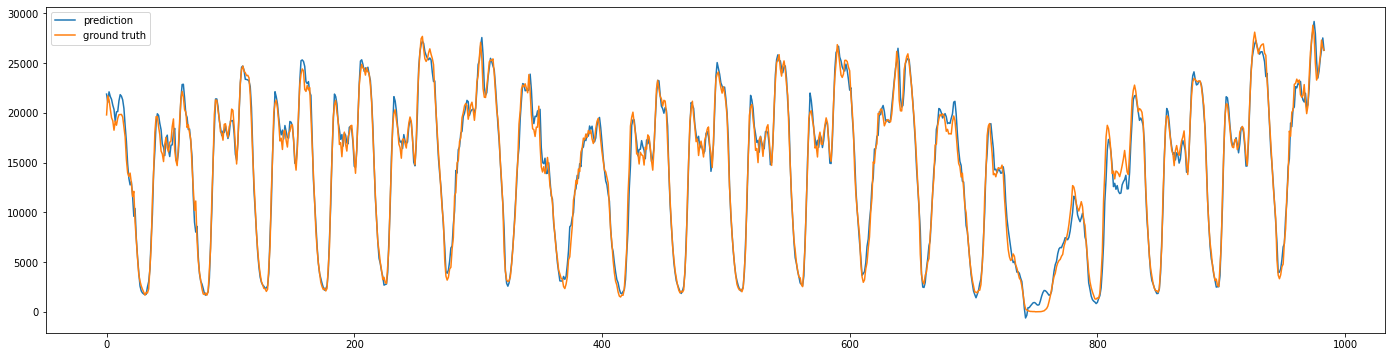

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,6))
plt.plot(pred_unscale[:,:,0])
plt.plot(groundtruth_unscale[:,:,0])
plt.legend(["prediction", "ground truth"])

Save & restore the forecaster.

In [ ]:
forecaster.save("nyc_taxi.fxt")
forecaster.load("nyc_taxi.fxt")

INFO:pytorch_lightning.utilities.seed:Global seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


#### **[Tune a Forecasting Task Automatically](https://bigdl.readthedocs.io/en/latest/doc/Chronos/QuickStart/chronos-autotsest-quickstart.html)**

##### **Environment Preparation**

**Install bigdl-chronos**

You can install the latest pre-release version with automl support using `pip install --pre --upgrade bigdl-chronos[all]`. 

In [ ]:
# Install latest pre-release version of bigdl-chronos 
# Installing bigdl-chronos from pypi
!pip install --pre --upgrade bigdl-chronos[pytorch,distributed]
!pip uninstall -y torchtext # uninstall torchtext to avoid version conflict
exit() # restart the runtime to refresh installed pkg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pyspark-2.4.6-py2.py3-none-any.whl
  Using cached py4j-0.10.7-py2.py3-none-any.whl (197 kB)
     |████████████████████████████████| 125 kB 5.2 MB/s 
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9
    Uninstalling py4j-0.10.9:
      Successfully uninstalled py4j-0.10.9
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.1.2
    Uninstalling pyspark-3.1.2:
      Successfully uninstalled pyspark-3.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigdl-dllib-spark3 0.14.0b20211107 requires pyspark==3.1.2, but you have pyspark 2.4.6 which is incompatible.


##### **Distributed automl for time series forecasting using Chronos AutoTS**

In this guide we will demonstrate how to use Chronos AutoTS for automated time seires forecasting in 5 simple steps.

###### **Step 0: Prepare dataset**
We used NYC taxi passengers dataset in [Numenta Anomaly Benchmark (NAB)](https://github.com/numenta/NAB) for demo, which contains 10320 records, each indicating the total number of taxi passengers in NYC at a corresonponding time spot.

In [ ]:
# download the dataset
!wget https://raw.githubusercontent.com/numenta/NAB/v1.0/data/realKnownCause/nyc_taxi.csv

--2022-11-29 08:15:54--  https://raw.githubusercontent.com/numenta/NAB/v1.0/data/realKnownCause/nyc_taxi.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265771 (260K) [text/plain]
Saving to: ‘nyc_taxi.csv.4’

nyc_taxi.csv.4      100%[===================>] 259.54K  --.-KB/s    in 0.03s   

2022-11-29 08:15:54 (8.08 MB/s) - ‘nyc_taxi.csv.4’ saved [265771/265771]



In [ ]:
# load the dataset. The downloaded dataframe contains two columns, "timestamp" and "value".
import pandas as pd
df = pd.read_csv("nyc_taxi.csv", parse_dates=["timestamp"])

###### **Step 1: Init Orca Context** 

In [ ]:
# import necesary libraries and modules
from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext

Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/conf/spark-bigdl.conf to sys.path


This is the only place where you need to specify local or distributed mode. View [Orca Context](https://analytics-zoo.readthedocs.io/en/latest/doc/Orca/Overview/orca-context.html) for more details. Note that argument ```init_ray_on_spark``` must be ```True``` for Chronos.

In [ ]:
# recommended to set it to True when running bigdl-chronos in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

init_orca_context(cluster_mode="local", cores=4, init_ray_on_spark=True)

Initializing orca context
Current pyspark location is : /usr/local/lib/python3.7/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/bigdl/share/orca/lib/bigdl-orca-spark_2.4.6-2.2.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_2.4.6-2.2.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_3.1.2-0.14.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/core/lib/all-2.2.0-20220919.010507-1.jar pyspark-shell 
[main] WARN  org.apache.hadoop.util.NativeCodeLoader  - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2022-11-29 08:16:07,777 Thread-4 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-11-29 08:16:07,784 Thread-4 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-11-29 08:16:07,786 Thread-4 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-11-29 08:16:07,788 Thread-4 WARN The bufferSize is set to 4000 but bufferedIo is false: false
22-11-29 08:16:07 [Thread-4] INFO  Engine$:122 - Auto detect executor number and executor cores number
22-11-29 08:16:07 [Thread-4] INFO  Engine$:124 - Executor number is 1 and executor cores number is 4



User settings:

   KMP_AFFINITY=granularity=fine,compact,1,0
   KMP_BLOCKTIME=0
   KMP_EXTRA_ARGS=--listen_host=172.28.0.2 --target_host=172.28.0.2 --tunnel_background_save_url=https://colab.research.google.com/tun/m/cc48301118ce562b961b3c22d803539adc1e0c19/m-s-41jq7okppkp1 --tunnel_background_save_delay=10s --tunnel_periodic_background_save_frequency=30m0s --enable_output_coalescing=true --output_coalescing_required=true
   KMP_LISTEN_PORT=6000
   KMP_SETTINGS=1
   KMP_TARGET_PORT=9000
   OMP_NUM_THREADS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2

22-11-29 08:16:09 [Thread-4] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 14
[Thread-4] WARN  org.apache.spark.SparkContext  - Using an existing SparkContext; some configuration may not take effect.
22-11-29 08:16:09 [Thread-4] INFO  Engine$:461 - Find existing spark context. Checking the spark conf...
22-11-29 08:16:09 [Thread-4] WARN  Engine$:467 - Engine.init: Can not find spark.shuffle.reduceLocality.enabled. For details please check https://bigdl-project.github.io/master/#APIGuide/Engine/
22-11-29 08:16:09 [Thread-4] WARN  Engine$:467 - Engine.init: Can not find spark.driver.extraJavaOptions. For details please check https://bigdl-project.github.io/master/#APIGuide/Engine/
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.Sample
BigDLBasePickler registering: bigdl.dllib.utils.common  Sample
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.EvaluatedResult
BigDLBasePickler registering: bigdl.dllib.utils.common  EvaluatedResult
cls.getname: com.intel

2022-11-29 08:16:15,768	INFO services.py:1340 -- View the Ray dashboard at http://172.28.0.2:8265


{'node_ip_address': '172.28.0.2', 'raylet_ip_address': '172.28.0.2', 'redis_address': '172.28.0.2:6379', 'object_store_address': '/tmp/ray/session_2022-11-29_08-16-10_605306_5584/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-11-29_08-16-10_605306_5584/sockets/raylet', 'webui_url': '172.28.0.2:8265', 'session_dir': '/tmp/ray/session_2022-11-29_08-16-10_605306_5584', 'metrics_export_port': 53366, 'node_id': 'e17f827f4a779d61b6c5b59da1cbdc0a126bc0e97dfe240bed9d77b1'}


<SparkContext master=local[4] appName=pyspark-shell>

###### **Step 2: Data transformation and feature engineering using Chronos TSDataset**
[TSDataset](https://bigdl.readthedocs.io/en/latest/doc/PythonAPI/Chronos/tsdataset.html) is our abstract of time series dataset for data transformation and feature engineering. Here we use it to preprocess the data.

In [ ]:
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import StandardScaler

tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, # the dataframe to load
                                                              dt_col="timestamp",  # the column name specifying datetime
                                                              target_col="value", # the column name to predict
                                                              with_split=True, # split the dataset into 3 parts
                                                              val_ratio=0.1, # validation set ratio
                                                              test_ratio=0.1) # test set ratio

# for each tsdataset, we 
# 1. generate datetime feature columns.
# 2. impute the dataset with last occured value.
# 3. scale the dataset with standard scaler, fit = true for train data.
standard_scaler = StandardScaler()
for tsdata in [tsdata_train, tsdata_val, tsdata_test]:
    tsdata.gen_dt_feature()\
          .impute(mode="last")\
          .scale(standard_scaler, fit=(tsdata is tsdata_train))

###### **Step 3: Create an AutoTSEstimator**


[AutoTSEstimator](https://bigdl.readthedocs.io/en/latest/doc/PythonAPI/Chronos/autotsestimator.html) is our Automated TimeSeries Estimator for time series forecasting task.

In [ ]:
import bigdl.orca.automl.hp as hp
from bigdl.chronos.autots import AutoTSEstimator
auto_estimator = AutoTSEstimator(model='lstm', # the model name used for training
                                 search_space='normal', # a default hyper parameter search space
                                 past_seq_len=hp.randint(1, 10)) # hp sampling function of past_seq_len for auto-tuning

/usr/local/lib/python3.7/dist-packages/bigdl/chronos/autots/__init__.py:21: UserWarning: Users of `bigdl.chronos.autots` should unset bigdl-nano environment variables!Please run `source bigdl-nano-unset-env` in your bash terminal
  warnings.warn("Users of `bigdl.chronos.autots` should "


###### **Step 4: Fit with AutoTSEstimator**

In [ ]:
# fit with AutoTSEstimator for a returned TSPipeline
ts_pipeline = auto_estimator.fit(data=tsdata_train, # train dataset
                                 validation_data=tsdata_val, # validation dataset
                                 epochs=5) # number of epochs to train in each trial

2022-11-29 08:16:26,238	WARNING function_runner.py:562 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


Trial name,status,loc,dropout,hidden_dim,layer_num,lr,past_seq_len,selected_features
train_func_1e707_00000,PENDING,,0.0154621,16,1,0.00252235,3,[]
train_func_1e707_00001,PENDING,,0.0813432,32,1,0.000812616,4,"['WEEKOFYEAR', 'IS_WEEKEND', 'MONTH', 'WEEKDAY', 'DAYOFYEAR', 'DAY']"
train_func_1e707_00002,PENDING,,0.139828,64,1,0.00246748,1,"['MONTH', 'YEAR']"
train_func_1e707_00003,PENDING,,0.173105,16,2,0.00115021,1,"['WEEKOFYEAR', 'MONTH']"
train_func_1e707_00004,PENDING,,0.112691,32,2,0.00127663,6,"['DAY', 'WEEKDAY', 'DAYOFYEAR', 'YEAR', 'IS_WEEKEND']"
train_func_1e707_00005,PENDING,,0.11973,64,2,0.00522763,5,"['DAYOFYEAR', 'YEAR', 'WEEKDAY', 'WEEKOFYEAR']"


(bundle_reservation_check_func pid=5853) Adding /usr/local/lib/python3.7/dist-packages/bigdl/share/orca/lib/bigdl-orca-spark_2.4.6-2.2.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_2.4.6-2.2.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_3.1.2-0.14.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/core/lib/all-2.2.0-20220919.010507-1.jar to BIGDL_JARS
(bundle_reservation_check_func pid=5853) Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/conf/spark-bigdl.conf to sys.path
(bundle_reservation_check_func pid=5852) Adding /usr/local/lib/python3.7/dist-packages/bigdl/share/orca/lib/bigdl-orca-spark_2.4.6-2.2.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_2.4.6-2.2.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dis

(ImplicitFunc pid=5853) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/autots/__init__.py:21: UserWarning: Users of `bigdl.chronos.autots` should unset bigdl-nano environment variables!Please run `source bigdl-nano-unset-env` in your bash terminal
(ImplicitFunc pid=5853)   warnings.warn("Users of `bigdl.chronos.autots` should "
(ImplicitFunc pid=5853) Global seed set to 4164983958
(ImplicitFunc pid=5852) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/autots/__init__.py:21: UserWarning: Users of `bigdl.chronos.autots` should unset bigdl-nano environment variables!Please run `source bigdl-nano-unset-env` in your bash terminal
(ImplicitFunc pid=5852)   warnings.warn("Users of `bigdl.chronos.autots` should "
(ImplicitFunc pid=5852) Global seed set to 2988270915
(ImplicitFunc pid=5957) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/autots/__init__.py:21: UserWarning: Users of `bigdl.chronos.autots` should unset bigdl-nano environment variables!Please run `source bigdl-nano

Trial name,status,loc,dropout,hidden_dim,layer_num,lr,past_seq_len,selected_features
train_func_1e707_00000,RUNNING,172.28.0.2:5853,0.0154621,16,1,0.00252235,3,[]
train_func_1e707_00001,RUNNING,172.28.0.2:5852,0.0813432,32,1,0.000812616,4,"['WEEKOFYEAR', 'IS_WEEKEND', 'MONTH', 'WEEKDAY', 'DAYOFYEAR', 'DAY']"
train_func_1e707_00002,RUNNING,172.28.0.2:5956,0.139828,64,1,0.00246748,1,"['MONTH', 'YEAR']"
train_func_1e707_00003,RUNNING,172.28.0.2:5957,0.173105,16,2,0.00115021,1,"['WEEKOFYEAR', 'MONTH']"
train_func_1e707_00004,PENDING,,0.112691,32,2,0.00127663,6,"['DAY', 'WEEKDAY', 'DAYOFYEAR', 'YEAR', 'IS_WEEKEND']"
train_func_1e707_00005,PENDING,,0.11973,64,2,0.00522763,5,"['DAYOFYEAR', 'YEAR', 'WEEKDAY', 'WEEKOFYEAR']"


(ImplicitFunc pid=5956) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/autots/__init__.py:21: UserWarning: Users of `bigdl.chronos.autots` should unset bigdl-nano environment variables!Please run `source bigdl-nano-unset-env` in your bash terminal
(ImplicitFunc pid=5956)   warnings.warn("Users of `bigdl.chronos.autots` should "
(ImplicitFunc pid=5956) Global seed set to 2017377624


Trial name,status,loc,dropout,hidden_dim,layer_num,lr,past_seq_len,selected_features
train_func_1e707_00000,RUNNING,172.28.0.2:5853,0.0154621,16,1,0.00252235,3,[]
train_func_1e707_00001,RUNNING,172.28.0.2:5852,0.0813432,32,1,0.000812616,4,"['WEEKOFYEAR', 'IS_WEEKEND', 'MONTH', 'WEEKDAY', 'DAYOFYEAR', 'DAY']"
train_func_1e707_00002,RUNNING,172.28.0.2:5956,0.139828,64,1,0.00246748,1,"['MONTH', 'YEAR']"
train_func_1e707_00003,RUNNING,172.28.0.2:5957,0.173105,16,2,0.00115021,1,"['WEEKOFYEAR', 'MONTH']"
train_func_1e707_00004,PENDING,,0.112691,32,2,0.00127663,6,"['DAY', 'WEEKDAY', 'DAYOFYEAR', 'YEAR', 'IS_WEEKEND']"
train_func_1e707_00005,PENDING,,0.11973,64,2,0.00522763,5,"['DAYOFYEAR', 'YEAR', 'WEEKDAY', 'WEEKOFYEAR']"


Trial name,status,loc,dropout,hidden_dim,layer_num,lr,past_seq_len,selected_features,iter,total time (s),best_mse,mse
train_func_1e707_00000,RUNNING,172.28.0.2:5853,0.0154621,16,1,0.00252235,3,[],1,9.15053,0.0347684,0.0347684
train_func_1e707_00001,RUNNING,172.28.0.2:5852,0.0813432,32,1,0.000812616,4,"['WEEKOFYEAR', 'IS_WEEKEND', 'MONTH', 'WEEKDAY', 'DAYOFYEAR', 'DAY']",1,8.84871,0.237613,0.237613
train_func_1e707_00002,RUNNING,172.28.0.2:5956,0.139828,64,1,0.00246748,1,"['MONTH', 'YEAR']",,,,
train_func_1e707_00003,RUNNING,172.28.0.2:5957,0.173105,16,2,0.00115021,1,"['WEEKOFYEAR', 'MONTH']",,,,
train_func_1e707_00004,PENDING,,0.112691,32,2,0.00127663,6,"['DAY', 'WEEKDAY', 'DAYOFYEAR', 'YEAR', 'IS_WEEKEND']",,,,
train_func_1e707_00005,PENDING,,0.11973,64,2,0.00522763,5,"['DAYOFYEAR', 'YEAR', 'WEEKDAY', 'WEEKOFYEAR']",,,,


Trial name,status,loc,dropout,hidden_dim,layer_num,lr,past_seq_len,selected_features,iter,total time (s),best_mse,mse
train_func_1e707_00000,RUNNING,172.28.0.2:5853,0.0154621,16,1,0.00252235,3,[],2,16.9477,0.0280918,0.0280918
train_func_1e707_00001,RUNNING,172.28.0.2:5852,0.0813432,32,1,0.000812616,4,"['WEEKOFYEAR', 'IS_WEEKEND', 'MONTH', 'WEEKDAY', 'DAYOFYEAR', 'DAY']",2,17.2784,0.142922,0.142922
train_func_1e707_00002,RUNNING,172.28.0.2:5956,0.139828,64,1,0.00246748,1,"['MONTH', 'YEAR']",1,7.5446,0.0541144,0.0541144
train_func_1e707_00003,RUNNING,172.28.0.2:5957,0.173105,16,2,0.00115021,1,"['WEEKOFYEAR', 'MONTH']",1,8.86591,0.129682,0.129682
train_func_1e707_00004,PENDING,,0.112691,32,2,0.00127663,6,"['DAY', 'WEEKDAY', 'DAYOFYEAR', 'YEAR', 'IS_WEEKEND']",,,,
train_func_1e707_00005,PENDING,,0.11973,64,2,0.00522763,5,"['DAYOFYEAR', 'YEAR', 'WEEKDAY', 'WEEKOFYEAR']",,,,


Trial name,status,loc,dropout,hidden_dim,layer_num,lr,past_seq_len,selected_features,iter,total time (s),best_mse,mse
train_func_1e707_00000,RUNNING,172.28.0.2:5853,0.0154621,16,1,0.00252235,3,[],3,22.0342,0.0280918,0.029376
train_func_1e707_00001,RUNNING,172.28.0.2:5852,0.0813432,32,1,0.000812616,4,"['WEEKOFYEAR', 'IS_WEEKEND', 'MONTH', 'WEEKDAY', 'DAYOFYEAR', 'DAY']",3,22.2692,0.121338,0.121338
train_func_1e707_00002,RUNNING,172.28.0.2:5956,0.139828,64,1,0.00246748,1,"['MONTH', 'YEAR']",3,16.7605,0.0495328,0.0495328
train_func_1e707_00003,RUNNING,172.28.0.2:5957,0.173105,16,2,0.00115021,1,"['WEEKOFYEAR', 'MONTH']",2,15.0828,0.129682,0.142503
train_func_1e707_00004,PENDING,,0.112691,32,2,0.00127663,6,"['DAY', 'WEEKDAY', 'DAYOFYEAR', 'YEAR', 'IS_WEEKEND']",,,,
train_func_1e707_00005,PENDING,,0.11973,64,2,0.00522763,5,"['DAYOFYEAR', 'YEAR', 'WEEKDAY', 'WEEKOFYEAR']",,,,


Trial name,status,loc,dropout,hidden_dim,layer_num,lr,past_seq_len,selected_features,iter,total time (s),best_mse,mse
train_func_1e707_00000,RUNNING,172.28.0.2:5853,0.0154621,16,1,0.00252235,3,[],4,26.2642,0.0265757,0.0265757
train_func_1e707_00001,RUNNING,172.28.0.2:5852,0.0813432,32,1,0.000812616,4,"['WEEKOFYEAR', 'IS_WEEKEND', 'MONTH', 'WEEKDAY', 'DAYOFYEAR', 'DAY']",3,22.2692,0.121338,0.121338
train_func_1e707_00002,RUNNING,172.28.0.2:5956,0.139828,64,1,0.00246748,1,"['MONTH', 'YEAR']",4,19.9907,0.0495328,0.0639661
train_func_1e707_00003,RUNNING,172.28.0.2:5957,0.173105,16,2,0.00115021,1,"['WEEKOFYEAR', 'MONTH']",3,20.0843,0.129682,0.146203
train_func_1e707_00004,PENDING,,0.112691,32,2,0.00127663,6,"['DAY', 'WEEKDAY', 'DAYOFYEAR', 'YEAR', 'IS_WEEKEND']",,,,
train_func_1e707_00005,PENDING,,0.11973,64,2,0.00522763,5,"['DAYOFYEAR', 'YEAR', 'WEEKDAY', 'WEEKOFYEAR']",,,,


(ImplicitFunc pid=5853) Global seed set to 4164983958
(ImplicitFunc pid=5956) Global seed set to 2017377624


Trial name,status,loc,dropout,hidden_dim,layer_num,lr,past_seq_len,selected_features,iter,total time (s),best_mse,mse
train_func_1e707_00003,RUNNING,172.28.0.2:5957,0.173105,16,2,0.00115021,1,"['WEEKOFYEAR', 'MONTH']",4,25.0601,0.129682,0.142283
train_func_1e707_00004,RUNNING,172.28.0.2:5853,0.112691,32,2,0.00127663,6,"['DAY', 'WEEKDAY', 'DAYOFYEAR', 'YEAR', 'IS_WEEKEND']",,,,
train_func_1e707_00005,RUNNING,172.28.0.2:5956,0.11973,64,2,0.00522763,5,"['DAYOFYEAR', 'YEAR', 'WEEKDAY', 'WEEKOFYEAR']",,,,
train_func_1e707_00000,TERMINATED,172.28.0.2:5853,0.0154621,16,1,0.00252235,3,[],5,30.5562,0.0263993,0.0263993
train_func_1e707_00001,TERMINATED,172.28.0.2:5852,0.0813432,32,1,0.000812616,4,"['WEEKOFYEAR', 'IS_WEEKEND', 'MONTH', 'WEEKDAY', 'DAYOFYEAR', 'DAY']",5,33.3409,0.090647,0.090647
train_func_1e707_00002,TERMINATED,172.28.0.2:5956,0.139828,64,1,0.00246748,1,"['MONTH', 'YEAR']",5,23.3947,0.0495328,0.0547351


Trial name,status,loc,dropout,hidden_dim,layer_num,lr,past_seq_len,selected_features,iter,total time (s),best_mse,mse
train_func_1e707_00004,RUNNING,172.28.0.2:5853,0.112691,32,2,0.00127663,6,"['DAY', 'WEEKDAY', 'DAYOFYEAR', 'YEAR', 'IS_WEEKEND']",1,7.94425,0.0560766,0.0560766
train_func_1e707_00005,RUNNING,172.28.0.2:5956,0.11973,64,2,0.00522763,5,"['DAYOFYEAR', 'YEAR', 'WEEKDAY', 'WEEKOFYEAR']",1,9.00316,0.0489871,0.0489871
train_func_1e707_00000,TERMINATED,172.28.0.2:5853,0.0154621,16,1,0.00252235,3,[],5,30.5562,0.0263993,0.0263993
train_func_1e707_00001,TERMINATED,172.28.0.2:5852,0.0813432,32,1,0.000812616,4,"['WEEKOFYEAR', 'IS_WEEKEND', 'MONTH', 'WEEKDAY', 'DAYOFYEAR', 'DAY']",5,33.3409,0.090647,0.090647
train_func_1e707_00002,TERMINATED,172.28.0.2:5956,0.139828,64,1,0.00246748,1,"['MONTH', 'YEAR']",5,23.3947,0.0495328,0.0547351
train_func_1e707_00003,TERMINATED,172.28.0.2:5957,0.173105,16,2,0.00115021,1,"['WEEKOFYEAR', 'MONTH']",5,30.0439,0.129682,0.134192


Trial name,status,loc,dropout,hidden_dim,layer_num,lr,past_seq_len,selected_features,iter,total time (s),best_mse,mse
train_func_1e707_00004,RUNNING,172.28.0.2:5853,0.112691,32,2,0.00127663,6,"['DAY', 'WEEKDAY', 'DAYOFYEAR', 'YEAR', 'IS_WEEKEND']",2,15.0955,0.0447619,0.0447619
train_func_1e707_00005,RUNNING,172.28.0.2:5956,0.11973,64,2,0.00522763,5,"['DAYOFYEAR', 'YEAR', 'WEEKDAY', 'WEEKOFYEAR']",1,9.00316,0.0489871,0.0489871
train_func_1e707_00000,TERMINATED,172.28.0.2:5853,0.0154621,16,1,0.00252235,3,[],5,30.5562,0.0263993,0.0263993
train_func_1e707_00001,TERMINATED,172.28.0.2:5852,0.0813432,32,1,0.000812616,4,"['WEEKOFYEAR', 'IS_WEEKEND', 'MONTH', 'WEEKDAY', 'DAYOFYEAR', 'DAY']",5,33.3409,0.090647,0.090647
train_func_1e707_00002,TERMINATED,172.28.0.2:5956,0.139828,64,1,0.00246748,1,"['MONTH', 'YEAR']",5,23.3947,0.0495328,0.0547351
train_func_1e707_00003,TERMINATED,172.28.0.2:5957,0.173105,16,2,0.00115021,1,"['WEEKOFYEAR', 'MONTH']",5,30.0439,0.129682,0.134192


Trial name,status,loc,dropout,hidden_dim,layer_num,lr,past_seq_len,selected_features,iter,total time (s),best_mse,mse
train_func_1e707_00004,RUNNING,172.28.0.2:5853,0.112691,32,2,0.00127663,6,"['DAY', 'WEEKDAY', 'DAYOFYEAR', 'YEAR', 'IS_WEEKEND']",3,20.31,0.042092,0.042092
train_func_1e707_00005,RUNNING,172.28.0.2:5956,0.11973,64,2,0.00522763,5,"['DAYOFYEAR', 'YEAR', 'WEEKDAY', 'WEEKOFYEAR']",2,16.7188,0.0448707,0.0448707
train_func_1e707_00000,TERMINATED,172.28.0.2:5853,0.0154621,16,1,0.00252235,3,[],5,30.5562,0.0263993,0.0263993
train_func_1e707_00001,TERMINATED,172.28.0.2:5852,0.0813432,32,1,0.000812616,4,"['WEEKOFYEAR', 'IS_WEEKEND', 'MONTH', 'WEEKDAY', 'DAYOFYEAR', 'DAY']",5,33.3409,0.090647,0.090647
train_func_1e707_00002,TERMINATED,172.28.0.2:5956,0.139828,64,1,0.00246748,1,"['MONTH', 'YEAR']",5,23.3947,0.0495328,0.0547351
train_func_1e707_00003,TERMINATED,172.28.0.2:5957,0.173105,16,2,0.00115021,1,"['WEEKOFYEAR', 'MONTH']",5,30.0439,0.129682,0.134192


Trial name,status,loc,dropout,hidden_dim,layer_num,lr,past_seq_len,selected_features,iter,total time (s),best_mse,mse
train_func_1e707_00004,RUNNING,172.28.0.2:5853,0.112691,32,2,0.00127663,6,"['DAY', 'WEEKDAY', 'DAYOFYEAR', 'YEAR', 'IS_WEEKEND']",3,20.31,0.042092,0.042092
train_func_1e707_00005,RUNNING,172.28.0.2:5956,0.11973,64,2,0.00522763,5,"['DAYOFYEAR', 'YEAR', 'WEEKDAY', 'WEEKOFYEAR']",3,24.0751,0.0381071,0.0381071
train_func_1e707_00000,TERMINATED,172.28.0.2:5853,0.0154621,16,1,0.00252235,3,[],5,30.5562,0.0263993,0.0263993
train_func_1e707_00001,TERMINATED,172.28.0.2:5852,0.0813432,32,1,0.000812616,4,"['WEEKOFYEAR', 'IS_WEEKEND', 'MONTH', 'WEEKDAY', 'DAYOFYEAR', 'DAY']",5,33.3409,0.090647,0.090647
train_func_1e707_00002,TERMINATED,172.28.0.2:5956,0.139828,64,1,0.00246748,1,"['MONTH', 'YEAR']",5,23.3947,0.0495328,0.0547351
train_func_1e707_00003,TERMINATED,172.28.0.2:5957,0.173105,16,2,0.00115021,1,"['WEEKOFYEAR', 'MONTH']",5,30.0439,0.129682,0.134192


Trial name,status,loc,dropout,hidden_dim,layer_num,lr,past_seq_len,selected_features,iter,total time (s),best_mse,mse
train_func_1e707_00004,RUNNING,172.28.0.2:5853,0.112691,32,2,0.00127663,6,"['DAY', 'WEEKDAY', 'DAYOFYEAR', 'YEAR', 'IS_WEEKEND']",4,28.3022,0.042092,0.0440663
train_func_1e707_00005,RUNNING,172.28.0.2:5956,0.11973,64,2,0.00522763,5,"['DAYOFYEAR', 'YEAR', 'WEEKDAY', 'WEEKOFYEAR']",3,24.0751,0.0381071,0.0381071
train_func_1e707_00000,TERMINATED,172.28.0.2:5853,0.0154621,16,1,0.00252235,3,[],5,30.5562,0.0263993,0.0263993
train_func_1e707_00001,TERMINATED,172.28.0.2:5852,0.0813432,32,1,0.000812616,4,"['WEEKOFYEAR', 'IS_WEEKEND', 'MONTH', 'WEEKDAY', 'DAYOFYEAR', 'DAY']",5,33.3409,0.090647,0.090647
train_func_1e707_00002,TERMINATED,172.28.0.2:5956,0.139828,64,1,0.00246748,1,"['MONTH', 'YEAR']",5,23.3947,0.0495328,0.0547351
train_func_1e707_00003,TERMINATED,172.28.0.2:5957,0.173105,16,2,0.00115021,1,"['WEEKOFYEAR', 'MONTH']",5,30.0439,0.129682,0.134192


Trial name,status,loc,dropout,hidden_dim,layer_num,lr,past_seq_len,selected_features,iter,total time (s),best_mse,mse
train_func_1e707_00000,TERMINATED,172.28.0.2:5853,0.0154621,16,1,0.00252235,3,[],5,30.5562,0.0263993,0.0263993
train_func_1e707_00001,TERMINATED,172.28.0.2:5852,0.0813432,32,1,0.000812616,4,"['WEEKOFYEAR', 'IS_WEEKEND', 'MONTH', 'WEEKDAY', 'DAYOFYEAR', 'DAY']",5,33.3409,0.090647,0.090647
train_func_1e707_00002,TERMINATED,172.28.0.2:5956,0.139828,64,1,0.00246748,1,"['MONTH', 'YEAR']",5,23.3947,0.0495328,0.0547351
train_func_1e707_00003,TERMINATED,172.28.0.2:5957,0.173105,16,2,0.00115021,1,"['WEEKOFYEAR', 'MONTH']",5,30.0439,0.129682,0.134192
train_func_1e707_00004,TERMINATED,172.28.0.2:5853,0.112691,32,2,0.00127663,6,"['DAY', 'WEEKDAY', 'DAYOFYEAR', 'YEAR', 'IS_WEEKEND']",5,34.0403,0.0381196,0.0381196
train_func_1e707_00005,TERMINATED,172.28.0.2:5956,0.11973,64,2,0.00522763,5,"['DAYOFYEAR', 'YEAR', 'WEEKDAY', 'WEEKOFYEAR']",5,36.6363,0.0381071,0.0411559


2022-11-29 08:17:54,978	INFO tune.py:626 -- Total run time: 88.74 seconds (87.60 seconds for the tuning loop).
INFO:pytorch_lightning.utilities.seed:Global seed set to 3305064130
INFO:pytorch_lightning.utilities.seed:Global seed set to 3305064130


###### **Step 5: Further deployment with TSPipeline**

[TSPipeline](https://analytics-zoo.readthedocs.io/en/latest/doc/PythonAPI/Chronos/autotsestimator.html#tspipeline-experimental) is our E2E solution for time series forecasting task.

In [ ]:
# predict with the best trial
y_pred = ts_pipeline.predict(tsdata_test)

In [ ]:
# evaluate the result pipeline
mse, smape = ts_pipeline.evaluate(tsdata_test, metrics=["mse", "smape"])
print("Evaluate: the mean square error is", mse)
print("Evaluate: the smape value is", smape)

Evaluate: the mean square error is 1292921.217610031
Evaluate: the smape value is 5.665538788743987


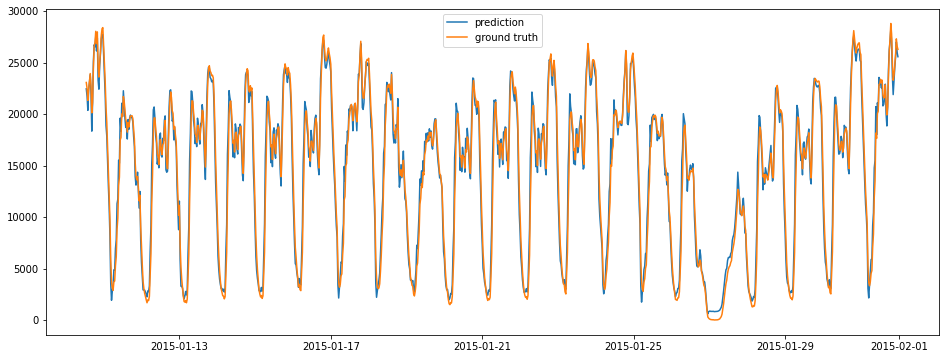

In [ ]:
# plot the result
import matplotlib.pyplot as plt

lookback = auto_estimator.get_best_config()['past_seq_len']
groundtruth_unscale = tsdata_test.unscale().to_pandas()[lookback - 1:]

plt.figure(figsize=(16,6))
plt.plot(groundtruth_unscale["timestamp"], y_pred[:,0,0])
plt.plot(groundtruth_unscale["timestamp"], groundtruth_unscale["value"])
plt.legend(["prediction", "ground truth"])

In [ ]:
# save the pipeline
my_ppl_file_path = "/tmp/saved_pipeline"
ts_pipeline.save(my_ppl_file_path)

In [ ]:
# restore the pipeline for further deployment
from bigdl.chronos.autots import TSPipeline
loaded_ppl = TSPipeline.load(my_ppl_file_path)

INFO:pytorch_lightning.utilities.seed:Global seed set to 3305064130


In [ ]:
# Stop orca context when your program finishes
stop_orca_context()

Stopping orca context


In [ ]:
# show a tensorboard view
%load_ext tensorboard
%tensorboard --logdir /tmp/autots_estimator/autots_estimator_leaderboard/

#### **[Detect Anomaly Point in Real Time Traffic Data](https://bigdl.readthedocs.io/en/latest/doc/Chronos/QuickStart/chronos-anomaly-detector.html)**

##### **Environment Preparation**

**Install bigdl-chronos**

You can install the latest pre-release version using `pip install --pre --upgrade bigdl-chronos[all]`. 

In [ ]:
# Install latest pre-release version of bigdl-chronos
# Installing bigdl-chronos from pypi
!pip install --pre --upgrade bigdl-chronos
!pip uninstall -y torchtext # uninstall torchtext to avoid version conflict
exit() # refresh the pkg you just install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##### **Unsupervised Anomaly Detection using Chronos Anomaly Detector**

Anomaly detection detects data points in data that does not fit well with the rest of data. In this quickstart we demonstrate how to do anomaly detection for 1-D data using Chronos's Anomaly Detector.

###### **Step 0: Prepare dataset**
For demonstration, we use the publicly available real time traffic data from the Twin Cities Metro area in Minnesota, collected by the Minnesota Department of Transportation. Detailed information can be found [here](https://github.com/numenta/NAB/blob/master/data/realTraffic/speed_7578.csv).

In [ ]:
# download the dataset
!wget https://raw.githubusercontent.com/numenta/NAB/master/data/realTraffic/speed_7578.csv

--2022-11-29 08:19:10--  https://raw.githubusercontent.com/numenta/NAB/master/data/realTraffic/speed_7578.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25928 (25K) [text/plain]
Saving to: ‘speed_7578.csv’

speed_7578.csv      100%[===================>]  25.32K  --.-KB/s    in 0.001s  

2022-11-29 08:19:10 (16.8 MB/s) - ‘speed_7578.csv’ saved [25928/25928]



###### **Step 1: Data Preprocessing**
Now we need to do data cleaning and preprocessing on the raw data. Note that this part could vary for different dataset. 

For the machine_usage data, the pre-processing contains 2 parts: <br>
1. Change the time interval from irregular to 5 minutes.<br>
2. Check missing values and handle missing data.

In [ ]:
import pandas as pd
df = pd.read_csv("speed_7578.csv", parse_dates=["timestamp"])
df.head()

,timestamp,value
0,2015-09-08 11:39:00,73
1,2015-09-08 11:44:00,62
2,2015-09-08 11:59:00,66
3,2015-09-08 12:19:00,69
4,2015-09-08 12:24:00,65


In [ ]:
from bigdl.chronos.data import TSDataset

tsdata = TSDataset.from_pandas(df, dt_col="timestamp", target_col="value")
df = tsdata.resample("5min")\
           .impute(mode="linear")\
           .to_pandas()

###### **Step 2: Use Chronos Anomaly Detector**
DBScanDetector uses DBSCAN clustering for anomaly detection. The DBSCAN algorithm tries to cluster the points and label the points that do not belong to any clusters as -1. It thus detects outliers detection in the input time series. DBScanDetector assigns anomaly score 1 to anomaly samples, and 0 to normal samples.

In [ ]:
from bigdl.chronos.detector.anomaly import DBScanDetector

ad = DBScanDetector(eps=0.3, min_samples=6)
ad.fit(df['value'].to_numpy())
anomaly_indexes = ad.anomaly_indexes()

###### **Step 3: Plot the result**
Draw anomalies(red) in line chart.

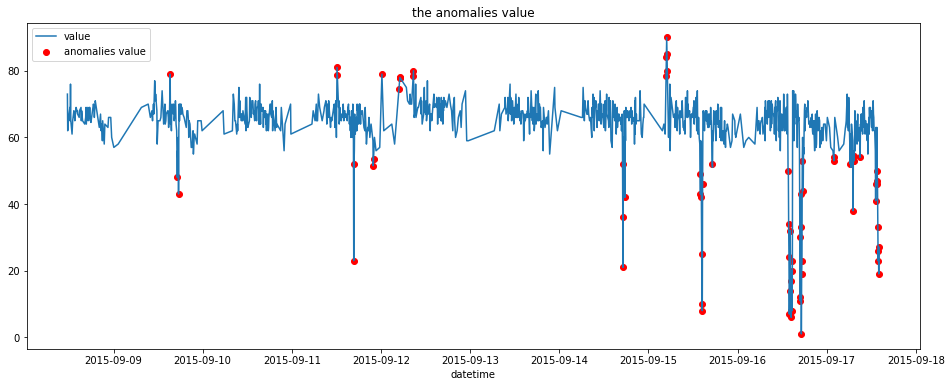

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.plot(df.timestamp, df.value, label='value')
plt.scatter(df.timestamp[anomaly_indexes],
            df.value[anomaly_indexes],
            color='red', label='anomalies value')

plt.title('the anomalies value')
plt.xlabel('datetime')
plt.legend(loc='upper left')
plt.show()